# Exploring Emotion Classification using GoEmotions  Dataset

In [ ]:
!pip install accelerate -U
!pip install transformers[sentencepiece] datasets

## Datasets library

In [588]:
from datasets import load_dataset
go_emotions = load_dataset("go_emotions")
go_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

## Overview of Go Emotion Dataset

In [589]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [590]:
go_emotions.set_format('pandas')
df = go_emotions['train'][:]
df=df.append(go_emotions['validation'][:])
df=df.append(go_emotions['test'][:])
df.sample(frac=1 ,random_state=1).head(5)

<ipython-input-590-7421608cefe8>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(go_emotions['validation'][:])
<ipython-input-590-7421608cefe8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(go_emotions['test'][:])


text   labels  \
10413  the real crime would be to not finish what we started!     [27]   
3599                                    Is this about [NAME]?      [7]   
24081                                     🎶Living in America🎶     [27]   
27316                                          Casual uber ad     [27]   
24549                       Well that was strangely majestic.  [0, 26]   

            id  
10413  ef0w810  
3599   eepwsnq  
24081  eev0ya6  
27316  edfd73o  
24549  eeor54h

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54263 entries, 0 to 5426
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54263 non-null  object
 1   labels  54263 non-null  object
 2   id      54263 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [592]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

0                                            My favourite food is anything I didn't have to cook myself.
0                                       Is this in New Orleans?? I really feel like this is New Orleans.
0    I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!
Name: text, dtype: object

In [593]:
emotion_list = ['admiration', 'amusement', 'anger', 'annoyance',
                'approval', 'caring', 'confusion', 'curiosity',
                'desire', 'disappointment', 'disapproval', 'disgust',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']
print(emotion_list)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [594]:
def idx2class(idx_list):
    arr = []
    for i in idx_list:
        arr.append(emotion_list[int(i)])
    return arr

In [595]:
df['Emotions'] = df['labels'].apply(idx2class)

In [596]:
df["Emotions"].value_counts()

[neutral]                                 16021
[admiration]                               3384
[gratitude]                                2378
[approval]                                 2367
[amusement]                                2046
                                          ...  
[approval, gratitude, optimism]               1
[admiration, fear, sadness]                   1
[approval, fear, sadness]                     1
[disappointment, disapproval, neutral]        1
[amusement, optimism, neutral]                1
Name: Emotions, Length: 782, dtype: int64

In [597]:
ekman_mapping = {
"anger": ["anger", "annoyance", "disapproval"],
"disgust": ["disgust"],
"fear": ["fear", "nervousness"],
"joy": ["joy", "amusement", "approval", "excitement", "gratitude",  "love", "optimism", "relief", "pride", "admiration", "desire", "caring"],
"sadness": ["sadness", "disappointment", "embarrassment", "grief",  "remorse"],
"surprise": ["surprise", "realization", "confusion", "curiosity"]
}

In [598]:
ekman_mapping

{'anger': ['anger', 'annoyance', 'disapproval'],
 'disgust': ['disgust'],
 'fear': ['fear', 'nervousness'],
 'joy': ['joy',
  'amusement',
  'approval',
  'excitement',
  'gratitude',
  'love',
  'optimism',
  'relief',
  'pride',
  'admiration',
  'desire',
  'caring'],
 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'],
 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}

In [599]:
basic_mapping = {
"negative": ["anger", "annoyance","disappointment", "disapproval","disgust","embarrassment","fear" , "grief", "nervousness", "remorse","sadness"],
"positive": ["admiration", "amusement","approval", "caring", "desire" ,"excitement", "gratitude", "joy",  "love", "optimism", "pride", "relief"],
"ambiguous": ["surprise", "realization", "confusion", "curiosity","neutral"]
}

In [600]:
basic_mapping

{'negative': ['anger',
  'annoyance',
  'disappointment',
  'disapproval',
  'disgust',
  'embarrassment',
  'fear',
  'grief',
  'nervousness',
  'remorse',
  'sadness'],
 'positive': ['admiration',
  'amusement',
  'approval',
  'caring',
  'desire',
  'excitement',
  'gratitude',
  'joy',
  'love',
  'optimism',
  'pride',
  'relief'],
 'ambiguous': ['surprise', 'realization', 'confusion', 'curiosity', 'neutral']}

In [601]:
def EmotionMappingbasic(emotion_list):
    map_list = []

    for i in emotion_list:
        if i in basic_mapping['negative']:
            map_list.append('negative')
        if i in basic_mapping['positive']:
            map_list.append('positive')
        if i in basic_mapping['ambiguous']:
            map_list.append('ambiguous')

    return map_list

In [602]:
def EmotionMapping(emotion_list):
    map_list = []

    for i in emotion_list:
        if i in ekman_mapping['anger']:
            map_list.append('anger')
        if i in ekman_mapping['disgust']:
            map_list.append('disgust')
        if i in ekman_mapping['fear']:
            map_list.append('fear')
        if i in ekman_mapping['joy']:
            map_list.append('joy')
        if i in ekman_mapping['sadness']:
            map_list.append('sadness')
        if i in ekman_mapping['surprise']:
            map_list.append('surprise')
        if i == 'neutral':
            map_list.append('neutral')

    return map_list

In [603]:
import numpy as np

In [604]:
basicemotiondf=df.copy()

In [605]:
allemotiondf=df.copy()

In [606]:
basicemotiondf['Basic Emotions']=basicemotiondf['Emotions'].apply(EmotionMappingbasic)

In [607]:
df['Mapped Emotions'] = df['Emotions'].apply(EmotionMapping)

In [608]:
basicemotiondf['ambiguous'] = np.zeros((len(basicemotiondf),1))
basicemotiondf['negative'] = np.zeros((len(basicemotiondf),1))
basicemotiondf['positive'] = np.zeros((len(basicemotiondf),1))

In [609]:
basicemotiondf.sample(5)

text  \
17024  Excelerate are looking really good yo. They've outslayed every map, are executing perfect plays. Fun, playing to their full potential.   
19890                                                             It looks like it's from the Molecule Effect on Santa Fe. Great quirky spot!   
40606                                                                                                                              I’d gladly   
34554                                    Twice in that article he implies these minority communities aren't ordinary [NAME]. It's disgusting.   
40771                                                                                           Yeah, try to buy a relationship, good idea...   

        labels       id                  Emotions        Basic Emotions  \
17024      [0]  eedmyod              [admiration]            [positive]   
19890  [0, 13]  ef2dygj  [admiration, excitement]  [positive, positive]   
40606     [17]  efatrve                     [joy]            [positive]   
34554     [11]  ef0zs2h                 [disgust]            [negative]   
40771      [0]  eez15uk              [admiration]            [positive]   

       ambiguous  negative  positive  
17024        0.0       0.0       0.0  
19890        0.0       0.0       0.0  
40606        0.0       0.0       0.0  
34554        0.0       0.0       0.0  
40771        0.0       0.0       0.0

In [610]:
for i in ['positive','negative','ambiguous']:
    basicemotiondf[i] = basicemotiondf['Basic Emotions'].apply(lambda x: 1 if i in x else 0)

In [611]:
basicemotiondf.sample(5)

text  \
3780                                                     Thanks for the kindness; it’s all good enough- I’m hoping to move out later this year   
33555                                                                                                          I thought so too, glad I asked.   
5196   I heard it's because of florida crime reporting laws - I.e. the same stuff could be happening elsewhere but it wouldn't make the press?   
3656                                      They never seem to think this when the police arrive, with their guns, to end a terrible situation.    
4773                                                                                                                      That head must hurt!   

         labels       id                Emotions          Basic Emotions  \
3780       [15]  editybe             [gratitude]              [positive]   
33555      [17]  eergrgz                   [joy]              [positive]   
5196     [6, 7]  eersflu  [confusion, curiosity]  [ambiguous, ambiguous]   
3656       [27]  edwyapx               [neutral]             [ambiguous]   
4773   [25, 27]  edrx7ju      [sadness, neutral]   [negative, ambiguous]   

       ambiguous  negative  positive  
3780           0         0         1  
33555          0         0         1  
5196           1         0         0  
3656           1         0         0  
4773           1         1         0

In [612]:
# reverse one-hot encoding
basicemotiondf['labels'] = (basicemotiondf.iloc[:, 5:] == 1).idxmax(1)

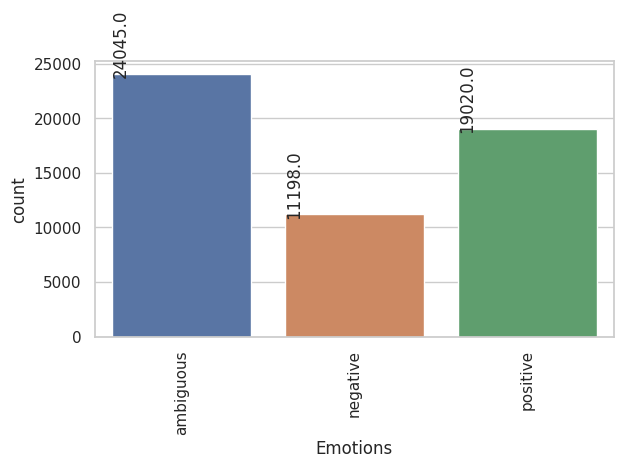

In [613]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
graph=sns.countplot(x='labels', data=basicemotiondf)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.xlabel("Emotions")
plt.tight_layout()

plt.show()

In [614]:
sentiment_map = {'ambiguous':0, 'negative':1, 'positive':2}
# Replace the sentiment values using the map
basicemotiondf['labels'] = basicemotiondf['labels'].apply(lambda x: sentiment_map[x])

In [615]:
allemotiondf['admiration'] = np.zeros((len(allemotiondf),1))
allemotiondf['amusement'] = np.zeros((len(allemotiondf),1))
allemotiondf['anger'] = np.zeros((len(allemotiondf),1))
allemotiondf['annoyance'] = np.zeros((len(allemotiondf),1))
allemotiondf['approval'] = np.zeros((len(allemotiondf),1))
allemotiondf['caring'] = np.zeros((len(allemotiondf),1))
allemotiondf['confusion'] = np.zeros((len(allemotiondf),1))
allemotiondf['curiosity'] = np.zeros((len(allemotiondf),1))
allemotiondf['desire'] = np.zeros((len(allemotiondf),1))
allemotiondf['disappointment'] = np.zeros((len(allemotiondf),1))
allemotiondf['disapproval'] = np.zeros((len(allemotiondf),1))
allemotiondf['disgust'] = np.zeros((len(allemotiondf),1))
allemotiondf['embarrassment'] = np.zeros((len(allemotiondf),1))
allemotiondf['excitement'] = np.zeros((len(allemotiondf),1))
allemotiondf['fear'] = np.zeros((len(allemotiondf),1))
allemotiondf['gratitude'] = np.zeros((len(allemotiondf),1))
allemotiondf['grief'] = np.zeros((len(allemotiondf),1))
allemotiondf['joy'] = np.zeros((len(allemotiondf),1))
allemotiondf['love'] = np.zeros((len(allemotiondf),1))
allemotiondf['nervousness'] = np.zeros((len(allemotiondf),1))
allemotiondf['optimism'] = np.zeros((len(allemotiondf),1))
allemotiondf['pride'] = np.zeros((len(allemotiondf),1))
allemotiondf['realization'] = np.zeros((len(allemotiondf),1))
allemotiondf['relief'] = np.zeros((len(allemotiondf),1))
allemotiondf['remorse'] = np.zeros((len(allemotiondf),1))
allemotiondf['sadness'] = np.zeros((len(allemotiondf),1))
allemotiondf['surprise'] = np.zeros((len(allemotiondf),1))
allemotiondf['neutral'] = np.zeros((len(allemotiondf),1))

In [618]:
allemotiondf.sample(3)


text  \
35595                                                  Goat sighting!!   
42643              Oh lord, we're about to have a hell of an offseason   
386    [NAME]?! Is that [NAME]? I know "meegwetch" means thank you lol   

        labels       id                Emotions  admiration  amusement  anger  \
35595     [13]  ed47ez1            [excitement]           0          0      0   
42643  [9, 14]  ef7zuuk  [disappointment, fear]           0          0      0   
386     [1, 6]  eeob8fo  [amusement, confusion]           0          1      0   

       annoyance  approval  caring  ...  love  nervousness  optimism  pride  \
35595          0         0       0  ...     0            0         0      0   
42643          0         0       0  ...     0            0         0      0   
386            0         0       0  ...     0            0         0      0   

       realization  relief  remorse  sadness  surprise  neutral  
35595            0       0        0        0         0        0  
42643            0       0        0        0         0        0  
386              0       0        0        0         0        0  

[3 rows x 32 columns]

In [619]:
for i in emotion_list:
    allemotiondf[i] = allemotiondf['Emotions'].apply(lambda x: 1 if i in x else 0)

In [621]:
allemotiondf.sample(3)

text  \
26630                                                      that sounds fun!   
638    Yeah, sorry, I was on the mobile site, and wasn't able to delete it.   
18692          Sure, its just that it was completely irrelevant to my reply   

      labels       id     Emotions  admiration  amusement  anger  annoyance  \
26630    [1]  edj0aei  [amusement]           0          1      0          0   
638     [24]  ef00c7a    [remorse]           0          0      0          0   
18692   [27]  ee7fxah    [neutral]           0          0      0          0   

       approval  caring  ...  love  nervousness  optimism  pride  realization  \
26630         0       0  ...     0            0         0      0            0   
638           0       0  ...     0            0         0      0            0   
18692         0       0  ...     0            0         0      0            0   

       relief  remorse  sadness  surprise  neutral  
26630       0        0        0         0        0  
638         0        1        0         0        0  
18692       0        0        0         0        1  

[3 rows x 32 columns]

In [622]:
# reverse one-hot encoding
allemotiondf['labels'] = (allemotiondf.iloc[:, 5:] == 1).idxmax(1)

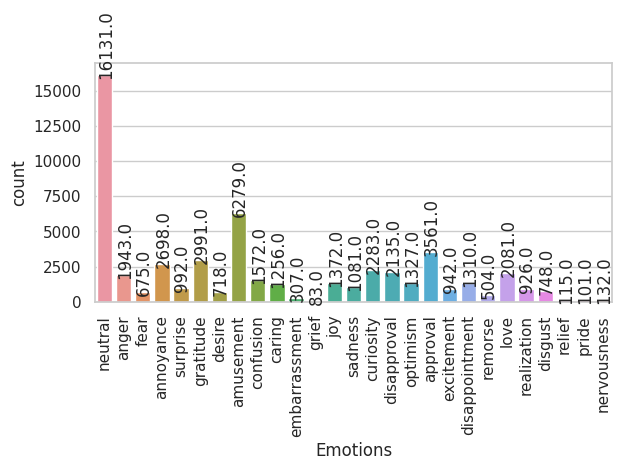

In [623]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
graph=sns.countplot(x='labels', data=allemotiondf)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.xlabel("Emotions")
plt.tight_layout()

plt.show()

In [624]:
df['anger'] = np.zeros((len(df),1))
df['disgust'] = np.zeros((len(df),1))
df['fear'] = np.zeros((len(df),1))
df['joy'] = np.zeros((len(df),1))
df['sadness'] = np.zeros((len(df),1))
df['surprise'] = np.zeros((len(df),1))
df['neutral'] = np.zeros((len(df),1))

In [625]:
for i in ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise','neutral']:
    df[i] = df['Mapped Emotions'].apply(lambda x: 1 if i in x else 0)

In [626]:
# reverse one-hot encoding
df['labels'] = (df.iloc[:, 5:] == 1).idxmax(1)

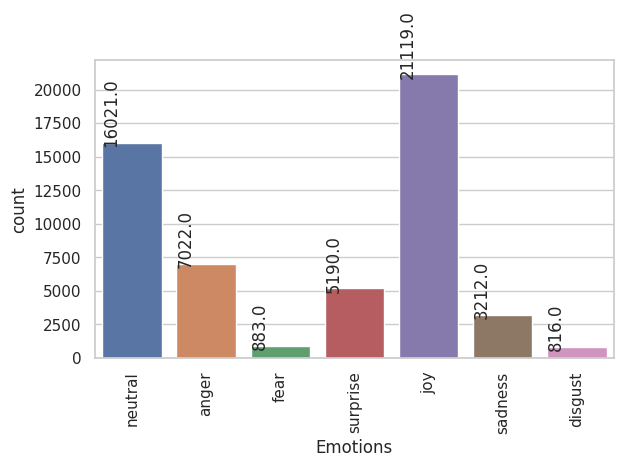

In [627]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
graph=sns.countplot(x='labels', data=df)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.xlabel("Emotions")
plt.tight_layout()

plt.show()

In [628]:
df.sample(5)

text  \
1439                                                                                                         The NEW & IMPROVED Doggy Slinky!!! Everyone loves a Slinky!   
15003                                                                                                           Ignored it and it will be forgotten 2-3 months from now.   
7688   The people who announce this early only mean to shape the conversation. We can measure his influence in dollars until a smaller subset of nominees take the lead.   
28817                                                                                       Yeah, Inbox didn't have those so I forgot all about it until they killed it.   
12255                          "I refuse to argue with anyone born before 1980: They don't even know how to rotate PDFs" That is exactly how this stupid argument sounds   

        labels       id       Emotions Mapped Emotions  anger  disgust  fear  \
1439       joy  edorteb         [love]           [joy]      0        0     0   
15003  neutral  eewshbb      [neutral]       [neutral]      0        0     0   
7688   neutral  ed8rz85      [neutral]       [neutral]      0        0     0   
28817     fear  edaq4ff  [nervousness]          [fear]      0        0     1   
12255    anger  eddm8r2    [annoyance]         [anger]      1        0     0   

       joy  sadness  surprise  neutral  
1439     1        0         0        0  
15003    0        0         0        1  
7688     0        0         0        1  
28817    0        0         0        0  
12255    0        0         0        0

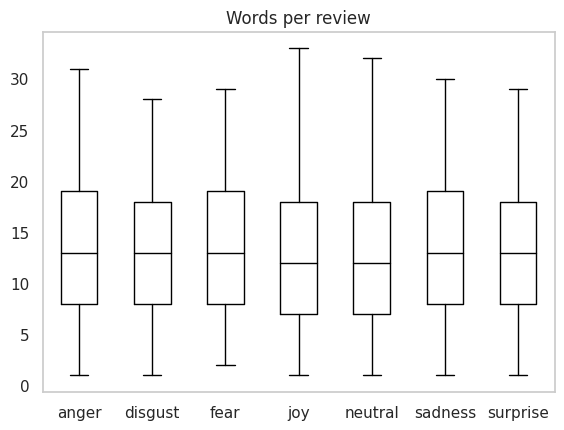

In [629]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="labels", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [630]:
# Removing sentences above 200 words
df[df.text.str.len() < 200]

text  \
0                                                          My favourite food is anything I didn't have to cook myself.   
1     Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead   
2                                                                                       WHY THE FUCK IS BAYLESS ISOING   
3                                                                                          To make her feel threatened   
4                                                                                               Dirty Southern Wankers   
...                                                                                                                ...   
5422                                              Thanks. I was diagnosed with BP 1 after the hospitalization as well.   
5423                                                                                            Well that makes sense.   
5424                                                                                               Daddy issues [NAME]   
5425                                               So glad I discovered that subreddit a couple months ago. So good...   
5426   Had to watch "Elmo in Grouchland" one time too many when my kids were little...musical Elmo / Oscar overdose...   

       labels       id      Emotions Mapped Emotions  anger  disgust  fear  \
0     neutral  eebbqej     [neutral]       [neutral]      0        0     0   
1     neutral  ed00q6i     [neutral]       [neutral]      0        0     0   
2       anger  eezlygj       [anger]         [anger]      1        0     0   
3        fear  ed7ypvh        [fear]          [fear]      0        0     1   
4       anger  ed0bdzj   [annoyance]         [anger]      1        0     0   
...       ...      ...           ...             ...    ...      ...   ...   
5422      joy  efeeasc   [gratitude]           [joy]      0        0     0   
5423      joy  ef9c7s3    [approval]           [joy]      0        0     0   
5424  neutral  efbiugo     [neutral]       [neutral]      0        0     0   
5425      joy  efbvgp9  [admiration]           [joy]      0        0     0   
5426  neutral  edtjpv6     [neutral]       [neutral]      0        0     0   

      joy  sadness  surprise  neutral  Words per review  
0       0        0         0        1                11  
1       0        0         0        1                20  
2       0        0         0        0                 6  
3       0        0         0        0                 5  
4       0        0         0        0                 3  
...   ...      ...       ...      ...               ...  
5422    1        0         0        0                12  
5423    1        0         0        0                 4  
5424    0        0         0        1                 3  
5425    1        0         0        0                12  
5426    0        0         0        1                19  

[54258 rows x 13 columns]

In [631]:
df=df.drop(['id','Words per review',	'Emotions',	'Mapped Emotions',	'anger'	,
        'disgust'	,'fear'	,'joy'	,'sadness',
        'surprise'	,'neutral'],axis=1)

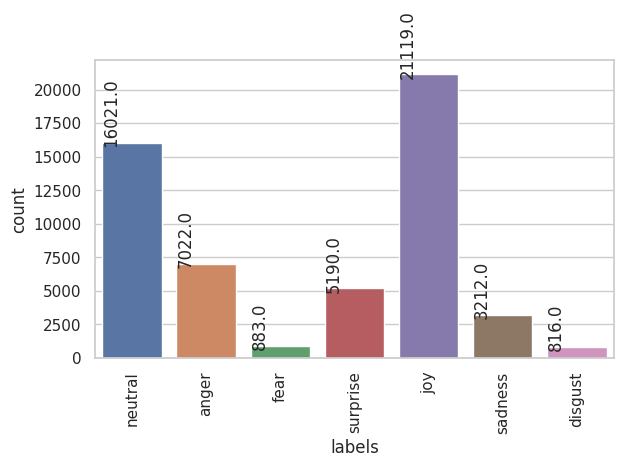

In [632]:
graph=sns.countplot(x='labels', data=df)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Removing neutral

In [633]:
df_neutral=df.copy()

In [634]:
df_without_neutral=df.copy()

In [635]:
# Drop rows based on a condition in a specific column
condition = df_without_neutral['labels'] == 'neutral'
df_without_neutral= df[~condition]

# Plotting in the order of number of rows per emotion

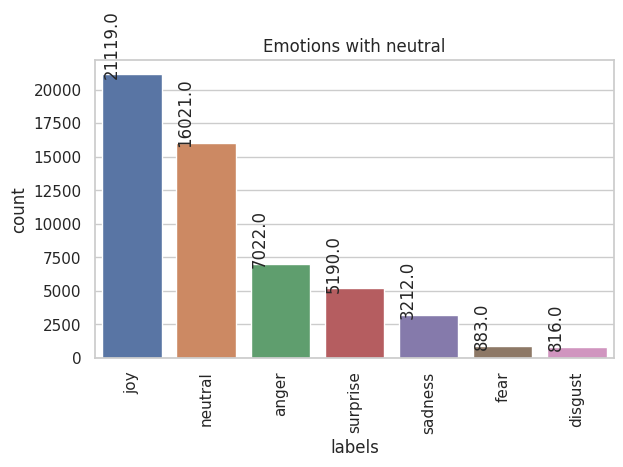

In [636]:
large_to_small = df_neutral.groupby('labels').size().sort_values().index[::-1]
graph=sns.countplot(x='labels', data=df_neutral, order=large_to_small)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
# displaying the title
plt.title("Emotions with neutral")
plt.show()

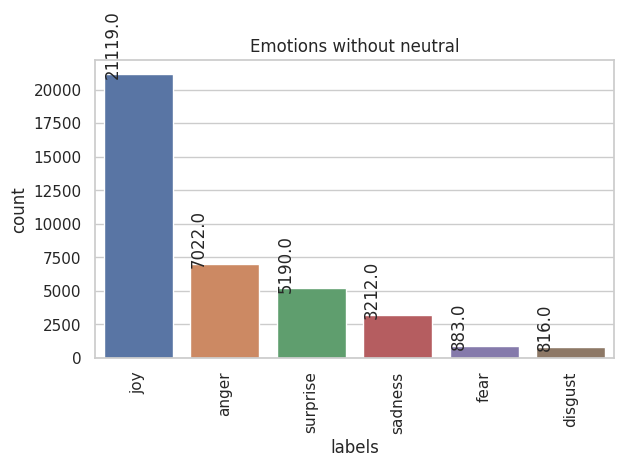

In [637]:
large_to_small = df_without_neutral.groupby('labels').size().sort_values().index[::-1]
graph=sns.countplot(x='labels', data=df_without_neutral, order=large_to_small)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
# displaying the title
plt.title("Emotions without neutral")
plt.show()

In [638]:
df.labels.unique()

array(['neutral', 'anger', 'fear', 'surprise', 'joy', 'sadness',
       'disgust'], dtype=object)

In [ ]:
# Define a dictionary to map sentiment values to integers
sentiment_map = {'neutral':0, 'anger':1, 'fear':2, 'surprise':3, 'joy':4, 'sadness':5,
       'disgust':6}

# Replace the sentiment values using the map
df['labels'] = df['labels'].apply(lambda x: sentiment_map[x])
df_without_neutral['labels']=df_without_neutral['labels'].apply(lambda x: sentiment_map[x])

In [641]:
df.labels.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54263 entries, 0 to 5426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54263 non-null  object
 1   labels  54263 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [643]:
df.sample(5)

text  \
12667                             Which means it isnt his fault? And the 4th? What the fuck was he supposed to do. stop blaming 1 player.   
20163                                                                           Im more impressed with the non-toxic team work! Good job!   
30941  You live in a wonderful fantasy world where all the students will pretend they are not adolescents with raging hormones. Charming.   
7572                                                                                                               Sort of like a window?   
12894                                                                                                      Amen as I dump mine this year!   

       labels  
12667       0  
20163       4  
30941       4  
7572        3  
12894       0

In [644]:
emotions=df.labels.unique()

# Balancing the dataset by removing excess rows

In [645]:
df_balanced=df.copy()

In [ ]:
# Set the desired count for each class
desired_count = 816

# Calculate the counts of each class
class_counts = df_balanced['labels'].value_counts()

# Create an empty DataFrame to store the balanced data
balanced_df = pd.DataFrame(columns=df_balanced.columns)

# Iterate through unique classes and add rows up to the desired count
for class_name in class_counts.index:
    class_subset = df_balanced[df_balanced['labels'] == class_name].head(desired_count)
    balanced_df = balanced_df.append(class_subset)

balanced_df['labels']=balanced_df['labels'].astype(int)

balanced_df.info()

# Balanced dataset Histogram

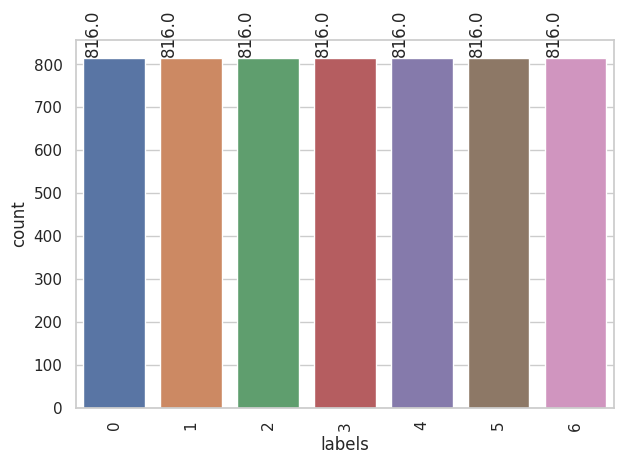

In [647]:
graph=sns.countplot(x='labels', data=balanced_df)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10),rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Saving the dataset after cleaning

In [484]:
# Making directory
import os
os.makedirs('/content/dataset', exist_ok=True)

In [485]:
# Saving to CSV
df.to_csv('/content/dataset/cleaned.csv')

In [486]:
# Reading from CSV
df= pd.read_csv('/content/dataset/cleaned.csv')
df1=df

# Choosing which dataset to use between the balanced, unbalanced with neutral emotion and without neutral emotion

In [487]:
selection=int(input("Choose the data: \n 1.Balanced \n 2.Without neutral \n 3.With neutral \n 4.Basic emotions\n"))

Choose the data: 
 1.Balanced 
 2.Without neutral 
 3.With neutral 
 4.Basic emotions
4


In [489]:
if(selection==1):
  dataset=balanced_df
elif(selection==2):
  dataset=df_without_neutral
elif(selection==3):
  dataset=df
elif(selection==4):
  df=basicemotiondf.drop(columns=['id',	'Emotions',	'Basic Emotions',	'ambiguous',	'negative',	'positive'])
  dataset=basicemotiondf


In [492]:
dataset.sample(5)

text  \
2482                                       I’ve always used a medium sized screwdriver but it can mess up the prongs so use a chopstick and you should be fine   
41656                                                                      How random. I did that just riding around town for no reason and saw that lighting.   
376                                                                                                                                  Omg so glad I’m not alone   
4367                                                                                                      Just goes to show it takes 0 skill to play that hero   
21727                      It's ironic that those who most strongly embrace TSSC and other churches are so often utterly lacking in any level of true "faith."   
34564                                                                                      You don't look at accidents on the road? Yeah, I don't believe you.   
1116                                                                                                           Wow... I’m so glad that my dog is lazy like me.   
28639  I stoped telling story because ''[NAME]"*. Drawing makes me look intensely people to measure their ratio and understand their shapes. That's my new fun   
42339                                                                                                                   Aww now I can’t listen to falling down   
8493                                              Thank you for your time and effort! I'm going to actively focus on enabling my Rein and tracking enemy ults.   

       labels       id       Emotions        Basic Emotions  ambiguous  \
2482        2  edc31f3     [approval]            [positive]          0   
41656       0  edxe4hh      [neutral]           [ambiguous]          1   
376         2  ed9uejc  [joy, relief]  [positive, positive]          0   
4367        2  ef1q5yu     [approval]            [positive]          0   
21727       1  eeyypz0  [disapproval]            [negative]          0   
34564       1  edl0bh1    [annoyance]            [negative]          0   
1116        2  eer7ups          [joy]            [positive]          0   
28639       2  edfbr59          [joy]            [positive]          0   
42339       0  eeqqqtt      [neutral]           [ambiguous]          1   
8493        2  ef8jmo1    [gratitude]            [positive]          0   

       negative  positive  
2482          0         1  
41656         0         0  
376           0         1  
4367          0         1  
21727         1         0  
34564         1         0  
1116          0         1  
28639         0         1  
42339         0         0  
8493          0         1

# Preprocessing

## Making statement text in lower case

In [394]:
dataset['text']=dataset['text'].str.lower()
dataset.sample(3)

text  \
4769                                                                            doubt bucks would ever let hm go though   
11170                                                                         that didn't go the way i thought it would   
4184   i've always wondered how cases where an individual gets a 7 or 8 figure sum issued against them work in practice   

       labels       id          Emotions Basic Emotions  ambiguous  negative  \
4769        0  eeaqv9i         [neutral]    [ambiguous]          1         0   
11170       1  eel7ngf  [disappointment]     [negative]          0         1   
4184        0  eeq9zem       [confusion]    [ambiguous]          1         0   

       positive  
4769          0  
11170         0  
4184          0

## Contraction to Expansion

In [395]:
# Defined a function to replace contraction with it's expansion.
!pip install contractions #installing contractions
import contractions

In [396]:
def contr_to_expand(word):
    if type(word) is str:
        word=contractions.fix(word)
        return word
    else:
        return word
# Applying the function to the dataset.
dataset['text'] = dataset['text'].apply(lambda x: contr_to_expand(x))
dataset.sample(3)

text  \
36077  you are just mad because you are starting to realize that you are reaaaaaaaaaaally close to being a [name].   
18509                                                                                                 hahaha! yes.   
4551                                                                                           they do with [name]   

       labels       id     Emotions Basic Emotions  ambiguous  negative  \
36077       0  edoubd3    [neutral]    [ambiguous]          1         0   
18509       2  edpvp11  [amusement]     [positive]          0         0   
4551        0  efa9j4z    [neutral]    [ambiguous]          1         0   

       positive  
36077         0  
18509         1  
4551          0

## Removing e-mail address

In [397]:
import re

In [398]:
# Finding and removing the expressions in the form of mail id.
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))
dataset.sample(3)

text  \
5101                                                omg you are so cute!   
5257         you can go on the offical league forum and look for people.   
23530  didt know he was a point guard and should have 7 assists a game .   

       labels       id      Emotions Basic Emotions  ambiguous  negative  \
5101        2  edchruo  [admiration]     [positive]          0         0   
5257        2  ef39njz    [approval]     [positive]          0         0   
23530       0  efd7sn6     [neutral]    [ambiguous]          1         0   

       positive  
5101          1  
5257          1  
23530         0

## Removing URL

In [399]:
# Finding and removing the expressions in the form of website address.
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))
dataset.sample(3)

text  \
1156                                                                                 canada? only because of [name] nice hair and silly socks.   
20856  "oh look a baby hippo" i am definitely not filming that wannabe. *goes to a gig* i better film this so o can never watch it ever again.   
303                                                                                             i am still waiting for a sick dunk from [name]   

       labels       id   Emotions Basic Emotions  ambiguous  negative  \
1156        0  ed4vnbs  [neutral]    [ambiguous]          1         0   
20856       0  ef7x43j  [neutral]    [ambiguous]          1         0   
303         0  ed4b232  [neutral]    [ambiguous]          1         0   

       positive  
1156          0  
20856         0  
303           0

## Removing @ taggings

In [400]:
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'(@[a-z0-9+._-]+)',"", x))
dataset.sample(3)

text  \
401    this does not belong on the competitive sub; it does not have anything to do with the competitive aspect of the game.   
31493                                                                                       going to jump sides 2nd half lol   
3325                         i would like to know too. how lucky am i that my first ever relationship was with a pwbpd. sigh   

       labels       id                 Emotions        Basic Emotions  \
401         1  edwkkir  [approval, disapproval]  [positive, negative]   
31493       2  efekm0t              [amusement]            [positive]   
3325        0  edy5lt7                [neutral]           [ambiguous]   

       ambiguous  negative  positive  
401            0         1         1  
31493          0         0         1  
3325           1         0         0

## Removing stop words

In [401]:
#importing NLTK for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [402]:
#Defining set containing all stopwords in English.
stopwordlist =  nltk.corpus.stopwords.words('english')

In [403]:
#Defining set containing all stopwords in English.
stopwordlist =  nltk.corpus.stopwords.words('english')
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwordlist]))
dataset.sample(3)

text  \
5374  guy wrong. yes, illegals pay taxes generally rely less government help native citizens.   
1633                                                                               dulls pain   
6435                                                              cool! definetly using this.   

      labels       id       Emotions Basic Emotions  ambiguous  negative  \
5374       0  ef139kx      [neutral]    [ambiguous]          1         0   
1633       1  ed4kt82  [nervousness]     [negative]          0         1   
6435       2  ed3bub2   [admiration]     [positive]          0         0   

      positive  
5374         0  
1633         0  
6435         1

## Cleaning Repeated characters

In [404]:
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'(.)1+', r'1',x))
dataset.sample(3)

text  labels       id  \
30952  reliable estimate. could happen early 2020’s unlucky       1  eeq6nfj   
37094                  [name] new favorite hollywood person       0  eeloddc   
5200                            meme? feels like depression       1  edout2d   

                       Emotions        Basic Emotions  ambiguous  negative  \
30952          [disappointment]            [negative]          0         1   
37094                 [neutral]           [ambiguous]          1         0   
5200   [annoyance, disapproval]  [negative, negative]          0         1   

       positive  
30952         0  
37094         0  
5200          0

## Removing numbers from the data

In [405]:
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[0-9]+', '',x))
dataset.sample(3)

text  labels  \
35567                                      damn wish service here.       2   
1300                                        dead find hs mate part       0   
34686  depends live. could probably move people share costs while.       0   

            id   Emotions Basic Emotions  ambiguous  negative  positive  
35567  edufg1x   [desire]     [positive]          0         0         1  
1300   ednobom  [neutral]    [ambiguous]          1         0         0  
34686  eexgn6f  [neutral]    [ambiguous]          1         0         0

# Tokenization

In [406]:
#Importing RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
# Creating a reference element for Class RegexpTokenizer
tk = RegexpTokenizer('\s+', gaps = True)
dataset['text'] =dataset['text'].apply(tk.tokenize)
dataset.sample(3)

text  labels  \
16041  [get, reason, restaurant, would, area, closest, one, chosen]       0   
16354        [think, really, learn, much, relax, get, comfortable.]       1   
11362                                              [[name], beast.]       0   

            id       Emotions Basic Emotions  ambiguous  negative  positive  
16041  edamfam      [neutral]    [ambiguous]          1         0         0  
16354  ed9fyxo  [disapproval]     [negative]          0         1         0  
11362  ef21dnp      [neutral]    [ambiguous]          1         0         0

# Stemming

In [407]:
import nltk
st = nltk.PorterStemmer()
dataset['text']= dataset['text'].apply(lambda text: [st.stem(word) for word in text])
dataset.sample(3)

text  labels  \
16714  [bet, lead, new, revolution., [name], keep, screw, himself.]       0   
43375            [relove., no,, fair, pricing,, collect, enormous.]       0   
30397     [fam., enjoy, [name]., he, great, kid, crazi, high, ceil]       2   

            id              Emotions         Basic Emotions  ambiguous  \
16714  eenmvbr  [annoyance, neutral]  [negative, ambiguous]          1   
43375  edlviwr             [neutral]            [ambiguous]          1   
30397  efh9noc          [admiration]             [positive]          0   

       negative  positive  
16714         1         0  
43375         0         0  
30397         0         1

# Lemmatization

In [408]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [409]:
lm = nltk.WordNetLemmatizer()
dataset['text'] = dataset['text'].apply(lambda text: [lm.lemmatize(word) for word in text])
dataset.sample(3)

text  \
16360           [op,, definit, manipulation., ignor, it,, promis, better, long, run.]   
3545      [foreplay,, connection,, know, doing., ask, blow, job, refus, reciprocate.]   
13899  [one, hit, peopl, knew, hard., happi, guy, time., hope, catch, bastard, soon.]   

       labels       id         Emotions        Basic Emotions  ambiguous  \
16360       2  edrexse       [approval]            [positive]          0   
3545        0  eegkjdg        [neutral]           [ambiguous]          1   
13899       2  eenpoxv  [joy, optimism]  [positive, positive]          0   

       negative  positive  
16360         0         1  
3545          0         0  
13899         0         1

# Joining back to sentences

In [410]:
dataset['text']=dataset['text'].apply(lambda x: " ".join(x))

In [411]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54263 entries, 0 to 5426
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            54263 non-null  object
 1   labels          54263 non-null  int64 
 2   id              54263 non-null  object
 3   Emotions        54263 non-null  object
 4   Basic Emotions  54263 non-null  object
 5   ambiguous       54263 non-null  int64 
 6   negative        54263 non-null  int64 
 7   positive        54263 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.7+ MB


# Saving the preprocessed dataset to a new csv

In [412]:
dataset.to_csv('/content/dataset/preprocessed.csv')

In [413]:
# dfpre= pd.read_csv('/content/dataset/preprocessed.csv')
# dataset=dfpre

## Splitting the data into test and train

In [572]:
X=dataset.text
y=dataset.labels

In [573]:
# Model utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [574]:
# Separating the 75% data for training data and 25% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =42,stratify=y)

## TF-IDF Vectoriser

In [575]:
vectorizer= TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [577]:
tfidf_tokens = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_train.toarray(),columns = tfidf_tokens)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

        00  000  00001  0001  000k  000s  000th  000x  003  00pm  ...  ᴍɪɴᴜᴛᴇ  \
0      0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
1      0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
2      0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
3      0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
4      0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
...    ...  ...    ...   ...   ...   ...    ...   ...  ...   ...  ...     ...   
40692  0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
40693  0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
40694  0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
40695  0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   
40696  0.0  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0  ...     0.0   

       

### Defining function for the confusion matrix

In [578]:
def matrix(model):
    # Predict class labels for the test set
    y_pred = model.predict(X_test)
    # Print classification report to evaluate model performance
    report = classification_report(y_test, y_pred)
    print(report)
    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')
                # xticklabels=['Neg', 'Pos'],
                # yticklabels=['Neg', 'Pos'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

In [579]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
def roccurve(model):



  # Binarize the labels
  y_train_bin = label_binarize(y_train, classes=np.unique(y))
  y_test_bin = label_binarize(y_test, classes=np.unique(y))

  # Calculate ROC curves and AUC for each class
  plt.figure(figsize=(10, 8))

  model.fit(X_train, y_train)
  y_score = model.predict_proba(X_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(len(np.unique(y))):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves for each class
  for i in range(len(np.unique(y))):
      plt.plot(fpr[i], tpr[i], label=f'{model} - Class {i} (AUC = {roc_auc[i]:.2f})')


  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curves for Multiclass Classification')
  plt.legend(loc='lower right')
  plt.show()

In [570]:
# Models from sklearnlibrary
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#1. BernaulliNB Model

In [195]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

In [196]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred1)

In [197]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.653766769865841


              precision    recall  f1-score   support

           0       0.62      0.79      0.69      6011
           1       0.64      0.28      0.39      2800
           2       0.71      0.70      0.71      4755

    accuracy                           0.65     13566
   macro avg       0.66      0.59      0.60     13566
weighted avg       0.66      0.65      0.64     13566



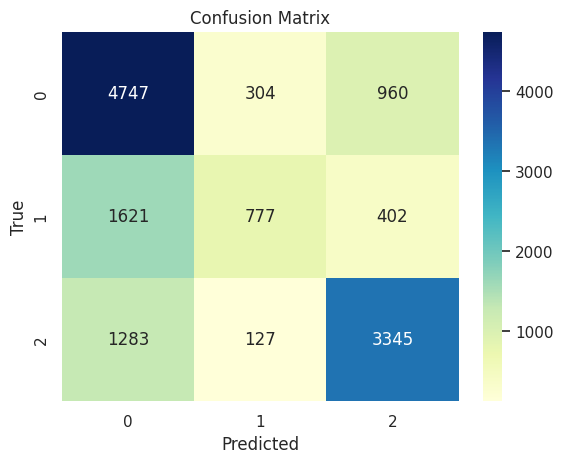

In [198]:
matrix(BNBmodel)

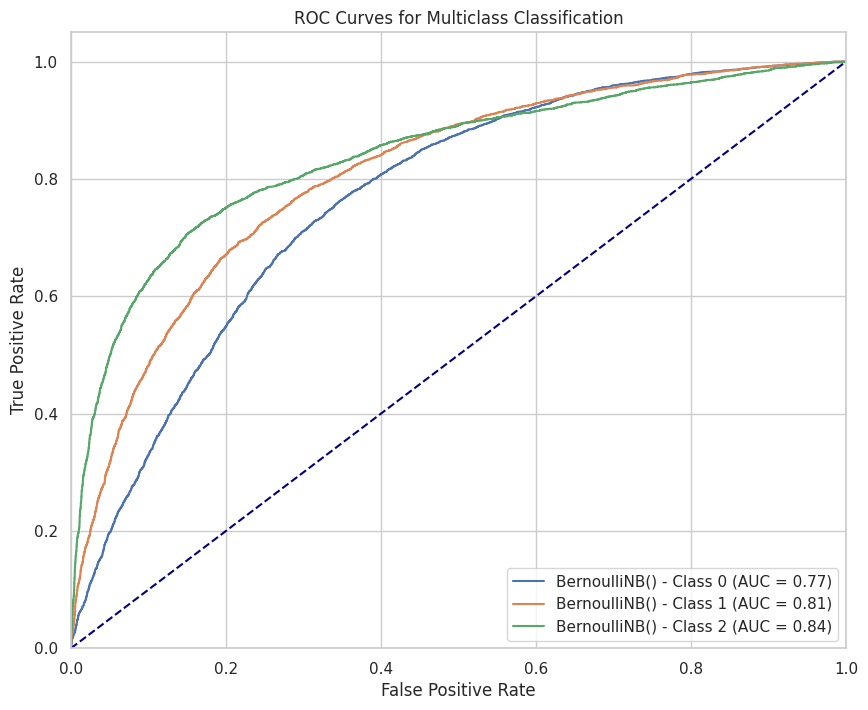

In [199]:
roccurve(BNBmodel)

#2. RandomForestClassifier Model

In [580]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)

In [201]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred2)

In [202]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.44309302668435796


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      1.00      0.61      6011
           1       0.00      0.00      0.00      2800
           2       0.00      0.00      0.00      4755

    accuracy                           0.44     13566
   macro avg       0.15      0.33      0.20     13566
weighted avg       0.20      0.44      0.27     13566



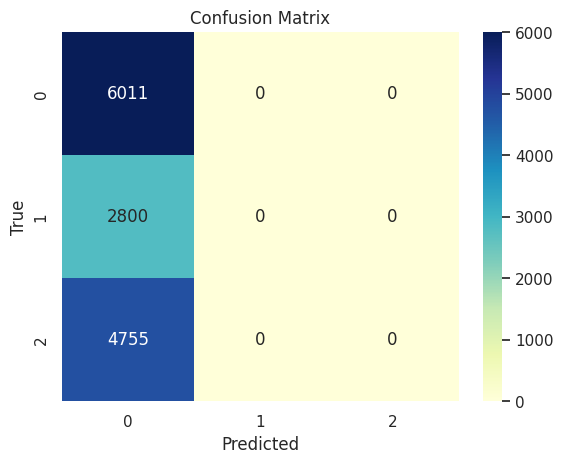

In [203]:
matrix(rf)

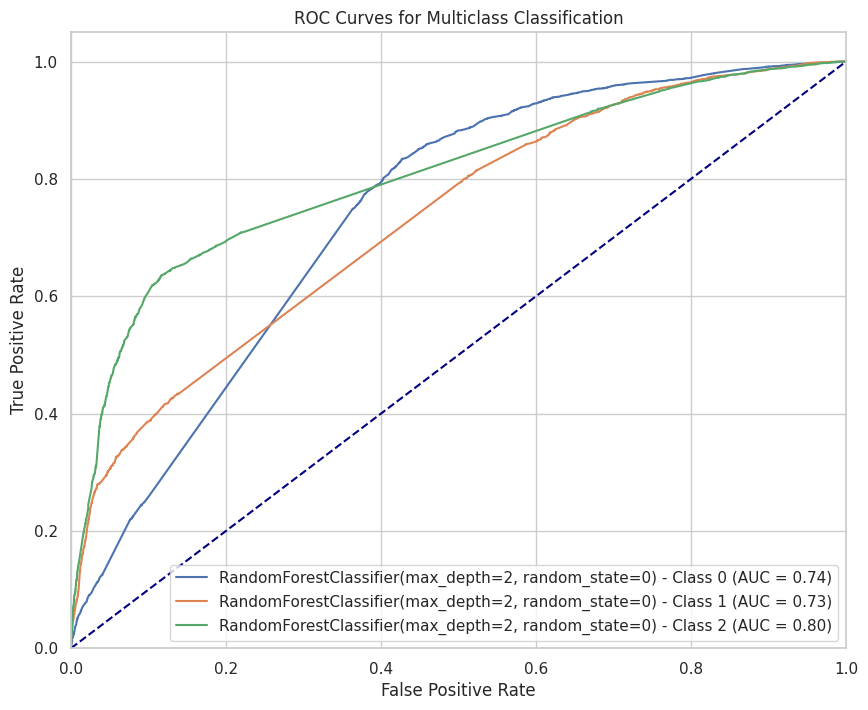

In [204]:
roccurve(rf)

#3. LRmodel Model


In [205]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
y_pred3 = LRmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred3)

In [207]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6889282028600914


              precision    recall  f1-score   support

           0       0.65      0.81      0.72      6011
           1       0.65      0.44      0.52      2800
           2       0.77      0.68      0.72      4755

    accuracy                           0.69     13566
   macro avg       0.69      0.64      0.66     13566
weighted avg       0.69      0.69      0.68     13566



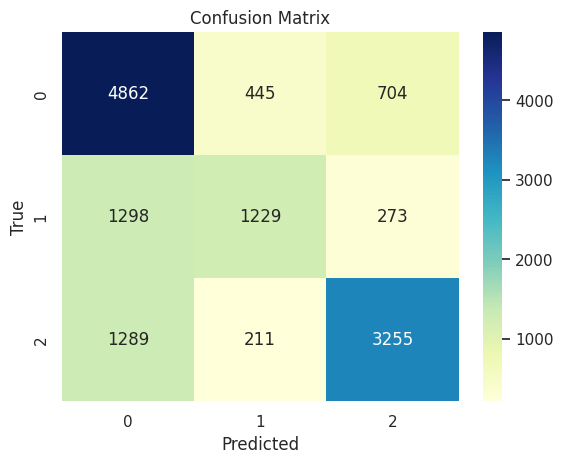

In [208]:
matrix(LRmodel)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


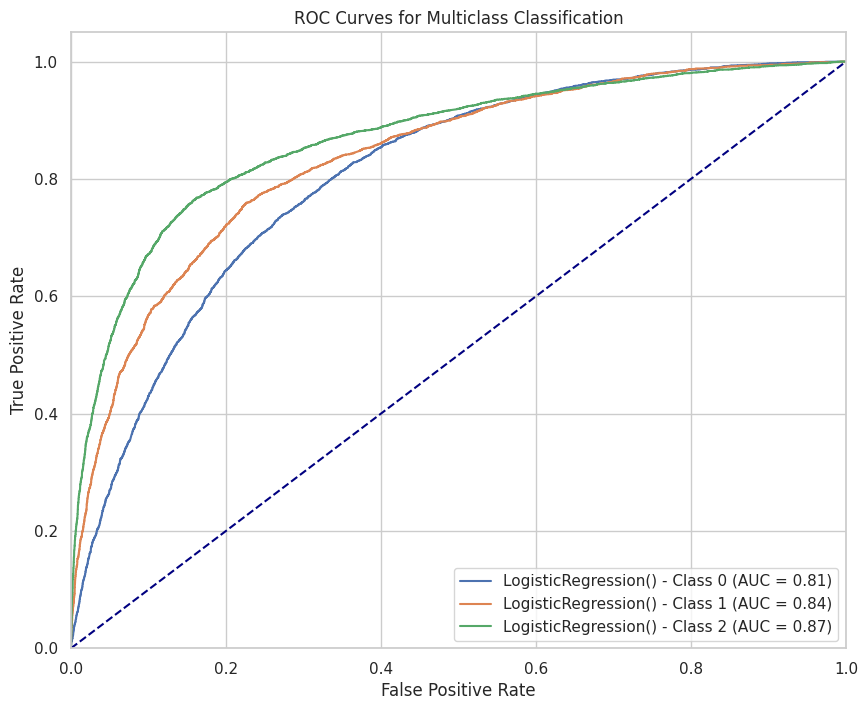

In [209]:
roccurve(LRmodel)

#4. SVM Model

In [210]:
svm_linear=SVC(kernel='linear', probability=True)
svm_linear.fit(X_train,y_train)
y_pred4=svm_linear.predict(X_test)

In [211]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred4)

In [212]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.7014595311808934


              precision    recall  f1-score   support

           0       0.66      0.82      0.73      6011
           1       0.67      0.46      0.55      2800
           2       0.78      0.69      0.73      4755

    accuracy                           0.70     13566
   macro avg       0.71      0.66      0.67     13566
weighted avg       0.71      0.70      0.70     13566



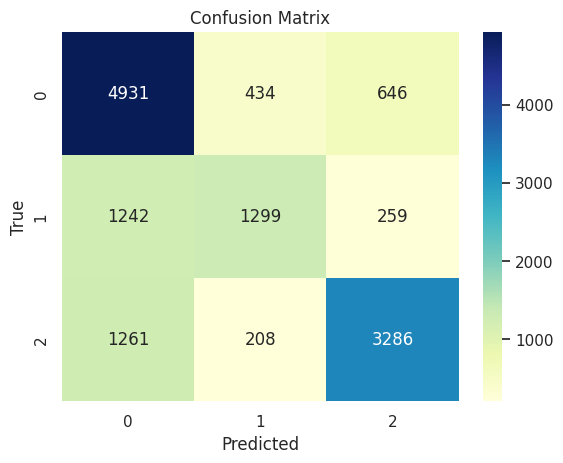

In [213]:
matrix(svm_linear)

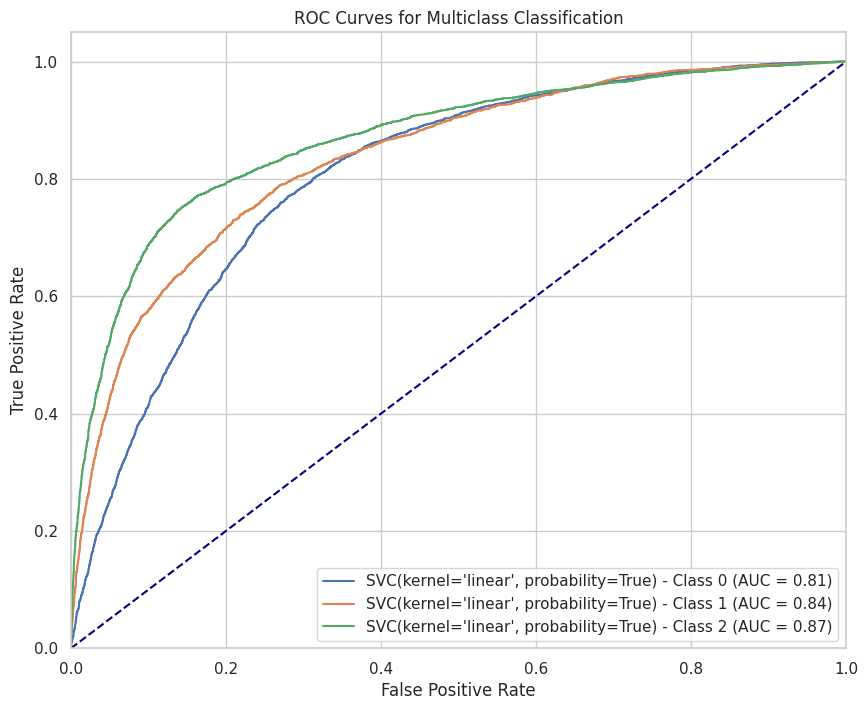

In [214]:
roccurve(svm_linear)

## 5.MultinomialNB Model

In [215]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred5=mnb.predict(X_test)

In [216]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred5)

In [217]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6179419136075482


              precision    recall  f1-score   support

           0       0.57      0.85      0.68      6011
           1       0.75      0.13      0.22      2800
           2       0.71      0.61      0.66      4755

    accuracy                           0.62     13566
   macro avg       0.68      0.53      0.52     13566
weighted avg       0.66      0.62      0.58     13566



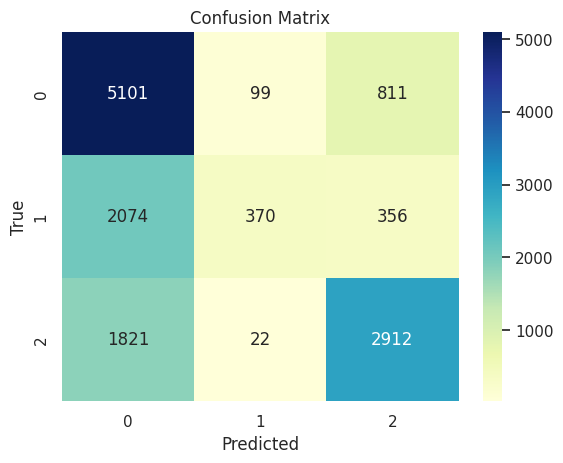

In [218]:
matrix(mnb)

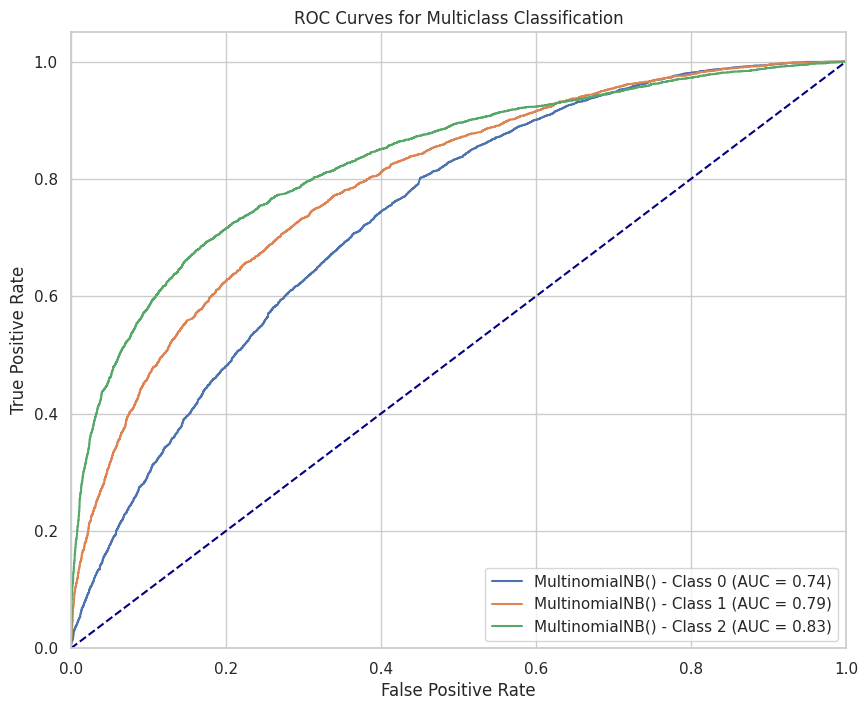

In [219]:
roccurve(mnb)

## 6.SGDClassifier Model

In [220]:
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
y_pred6=sgd.predict(X_test)

In [221]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred6)

In [222]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6905499041721952


              precision    recall  f1-score   support

           0       0.64      0.86      0.73      6011
           1       0.74      0.35      0.48      2800
           2       0.79      0.67      0.72      4755

    accuracy                           0.69     13566
   macro avg       0.72      0.63      0.64     13566
weighted avg       0.71      0.69      0.68     13566



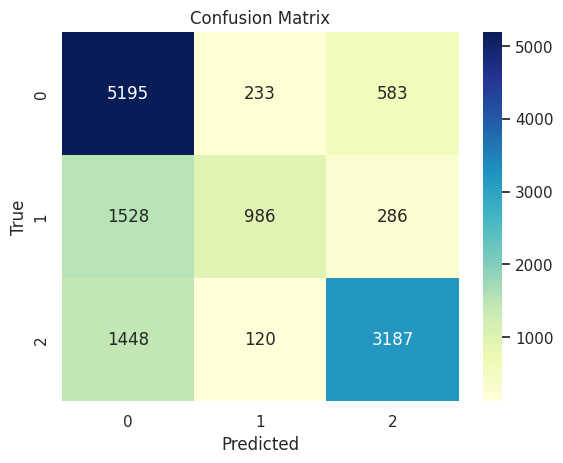

In [223]:
matrix(sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


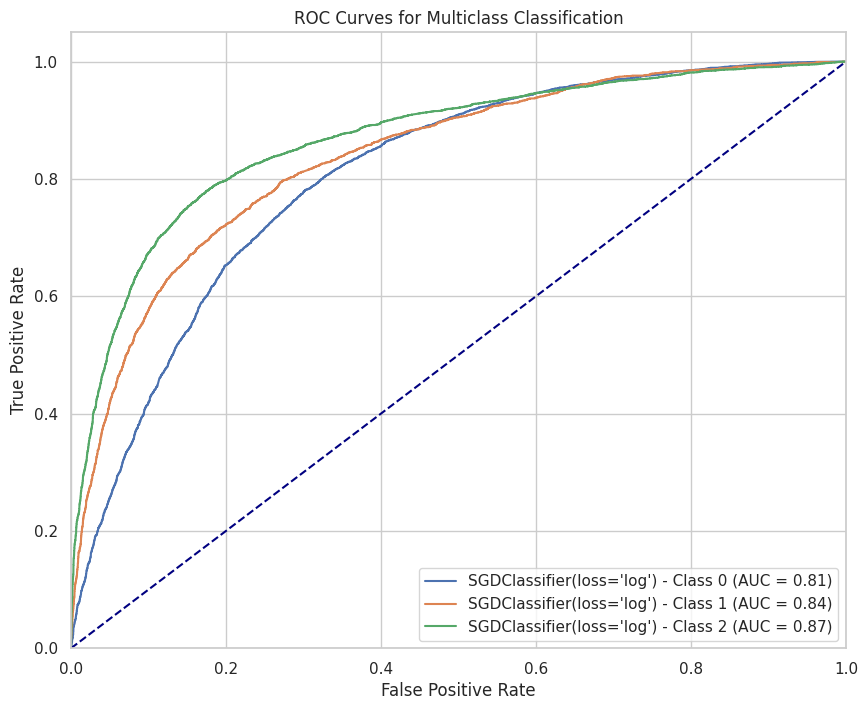

In [224]:
sgd=SGDClassifier(loss='log')
roccurve(sgd)

## 7.KNeighborsClassifier Model

In [225]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred7=knn.predict(X_test)

In [226]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred7)

In [227]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.522703818369453


              precision    recall  f1-score   support

           0       0.49      0.92      0.64      6011
           1       0.56      0.13      0.21      2800
           2       0.75      0.25      0.38      4755

    accuracy                           0.52     13566
   macro avg       0.60      0.43      0.41     13566
weighted avg       0.59      0.52      0.46     13566



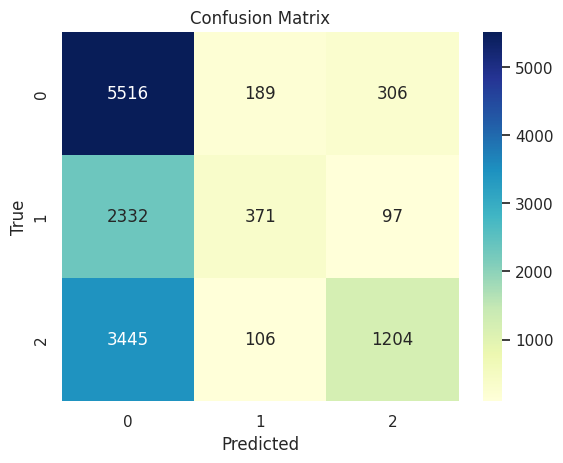

In [228]:
matrix(knn)

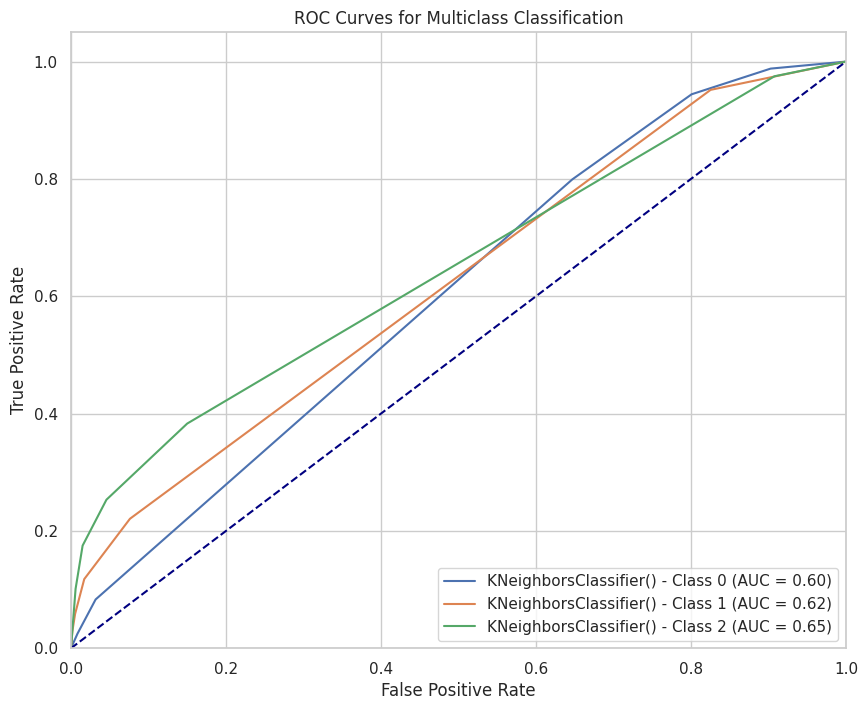

In [229]:
roccurve(knn)

## 8.DecisionTreeClassifier Model

In [230]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred8=dt.predict(X_test)

In [231]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred8)

In [232]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6299572460563173


              precision    recall  f1-score   support

           0       0.65      0.66      0.65      6011
           1       0.52      0.47      0.49      2800
           2       0.67      0.69      0.68      4755

    accuracy                           0.63     13566
   macro avg       0.61      0.61      0.61     13566
weighted avg       0.63      0.63      0.63     13566



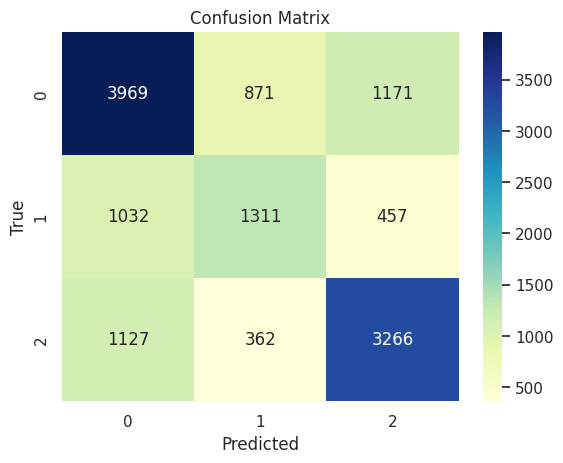

In [233]:
matrix(dt)

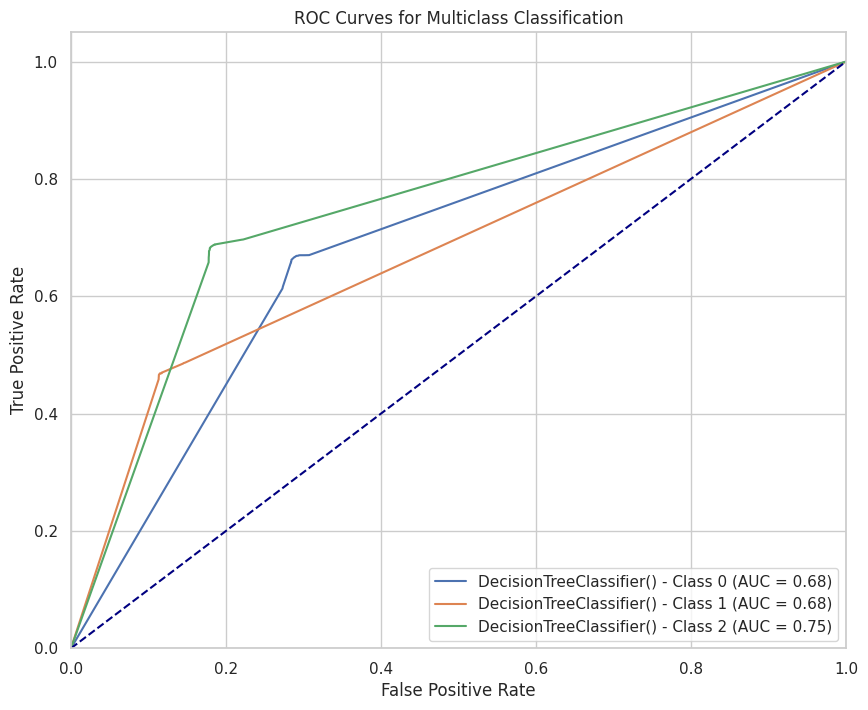

In [234]:
roccurve(dt)

## 9.GradientBoostingClassifier Model

In [235]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred9=gb.predict(X_test)

In [236]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred9)

In [237]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6653398201385817


              precision    recall  f1-score   support

           0       0.60      0.89      0.72      6011
           1       0.76      0.27      0.40      2800
           2       0.79      0.61      0.69      4755

    accuracy                           0.67     13566
   macro avg       0.72      0.59      0.60     13566
weighted avg       0.70      0.67      0.64     13566



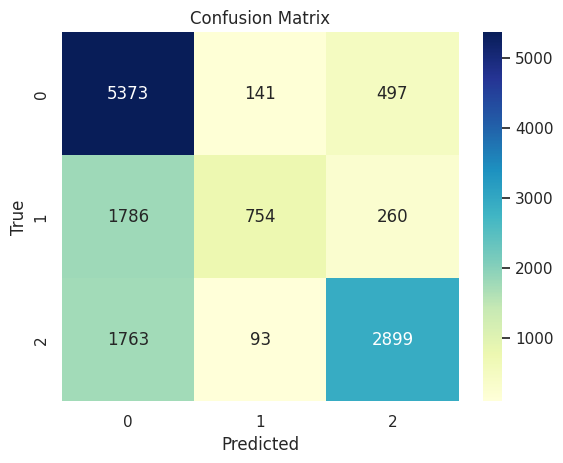

In [238]:
matrix(gb)

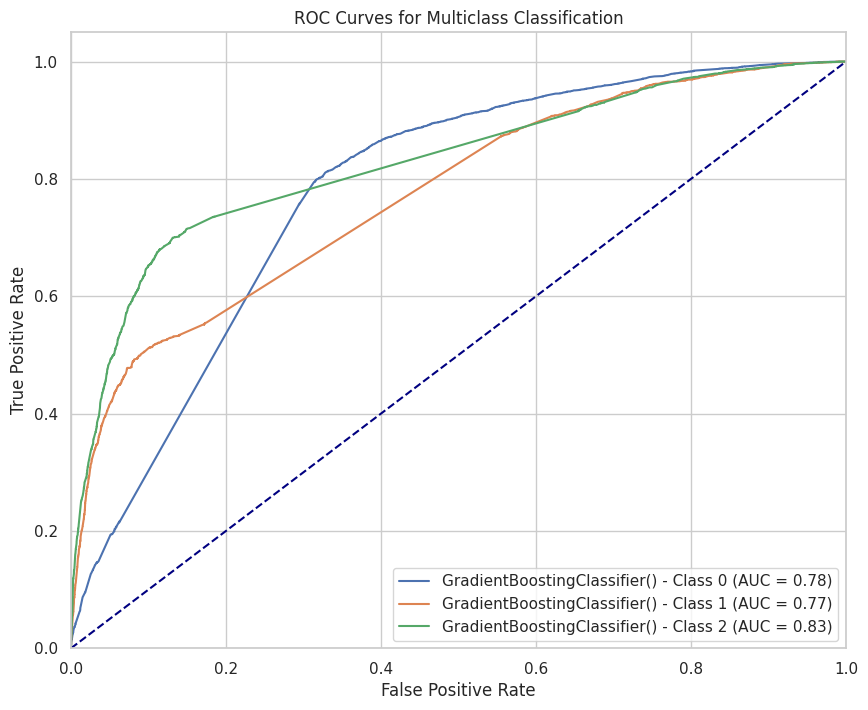

In [239]:
roccurve(gb)

## 10.LGBMClassifier Model

In [240]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred10=lgbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.421465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62038
[LightGBM] [Info] Number of data points in the train set: 40697, number of used features: 1728
[LightGBM] [Info] Start training from score -0.813896
[LightGBM] [Info] Start training from score -1.578161
[LightGBM] [Info] Start training from score -1.048345


In [241]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred10)

In [242]:
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.7029338051009878


              precision    recall  f1-score   support

           0       0.66      0.83      0.74      6011
           1       0.69      0.44      0.54      2800
           2       0.78      0.70      0.74      4755

    accuracy                           0.70     13566
   macro avg       0.71      0.66      0.67     13566
weighted avg       0.71      0.70      0.70     13566



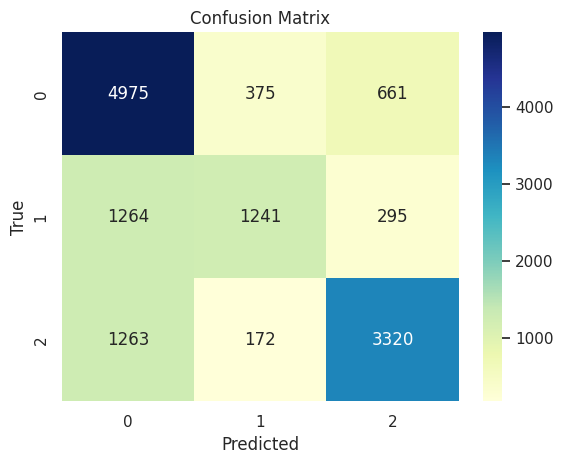

In [243]:
matrix(lgbm)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.458926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62038
[LightGBM] [Info] Number of data points in the train set: 40697, number of used features: 1728
[LightGBM] [Info] Start training from score -0.813896
[LightGBM] [Info] Start training from score -1.578161
[LightGBM] [Info] Start training from score -1.048345


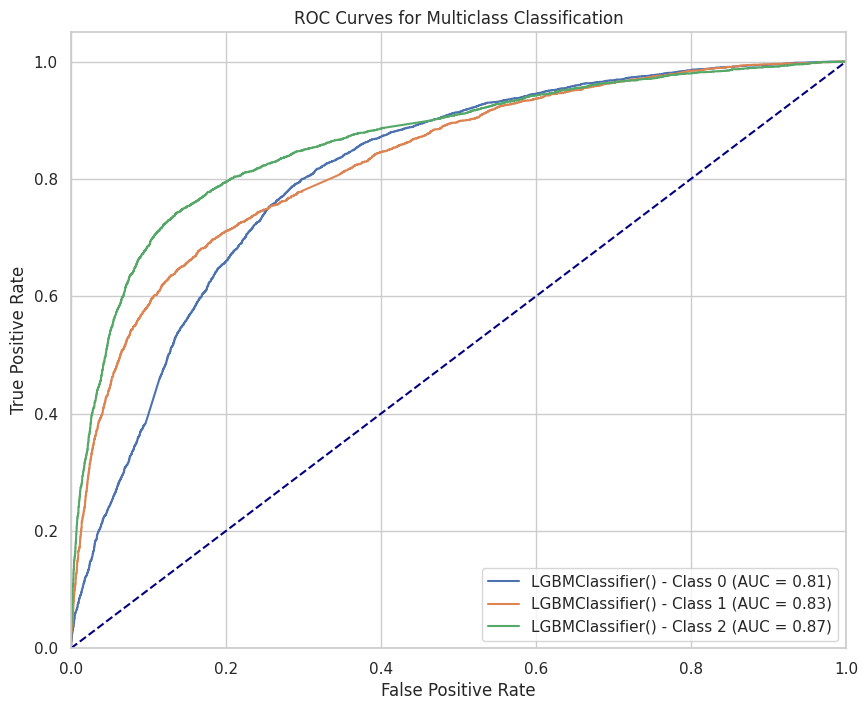

In [244]:
roccurve(lgbm)

#1. BernaulliNB Model
Accuracy is  : 0.653
#2. RandomForestClassifier Model
Accuracy is : 0.443
#3. LRmodel Model
Accuracy is :  0.6889
#4. SVM Model
Accuracy is :  0.7014
#5. MultinomialNB Model
Accuracy is :  0.6179
#6. SGDClassifier Modell
Accuracy is :  0.6905
#7. KNeighborsClassifier Model
Accuracy is :  0.5227
#8. DecisionTreeClassifier Model
Accuracy is :  0.6299
#9. GradientBoostingClassifier Model
Accuracy is :  0.6653
#10. LGBMClassifier Model
Accuracy is :  0.7029




# Result
SVM Model gives the best result with an accuracy of 0.677

#Hyperparameter tuning

#1. BernaulliNB Model



In [245]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
}

grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'alpha': 1.0}
Best accuracy: 0.650981614593852


In [246]:
BNBmodel = BernoulliNB(alpha= 0.1)

In [247]:
BNBmodel.fit(X_train,y_train)
y_pred11=BNBmodel.predict(X_test)

In [248]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred11)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6335692171605485


              precision    recall  f1-score   support

           0       0.63      0.70      0.66      6011
           1       0.53      0.42      0.47      2800
           2       0.68      0.68      0.68      4755

    accuracy                           0.63     13566
   macro avg       0.62      0.60      0.60     13566
weighted avg       0.63      0.63      0.63     13566



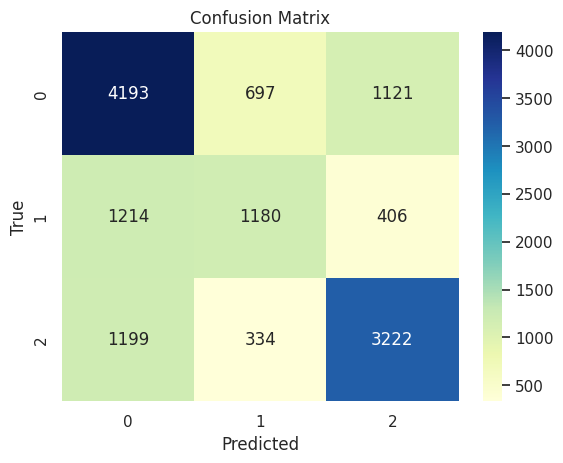

In [249]:
matrix(BNBmodel)

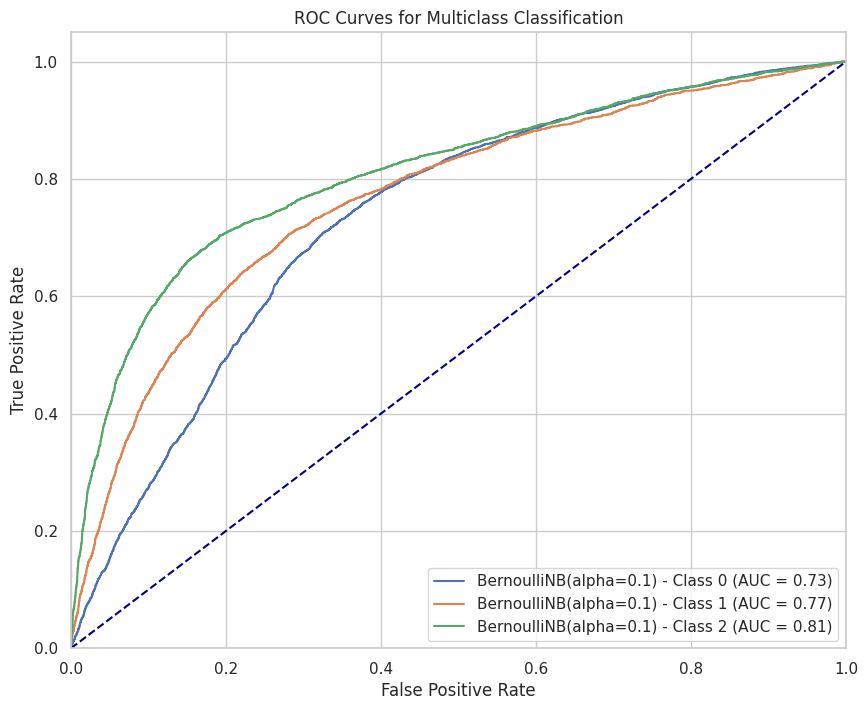

In [250]:
roccurve(BNBmodel)

#2. RandomForestClassifier Model



In [581]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best accuracy: 0.6787724889383571


In [583]:
rf = RandomForestClassifier(max_depth= None,n_estimators=200)

In [584]:
rf.fit(X_train,y_train)
y_pred12=rf.predict(X_test)

In [585]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred12)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6831048208757187


              precision    recall  f1-score   support

           0       0.63      0.87      0.73      6011
           1       0.77      0.29      0.43      2800
           2       0.78      0.68      0.72      4755

    accuracy                           0.68     13566
   macro avg       0.72      0.61      0.63     13566
weighted avg       0.71      0.68      0.66     13566



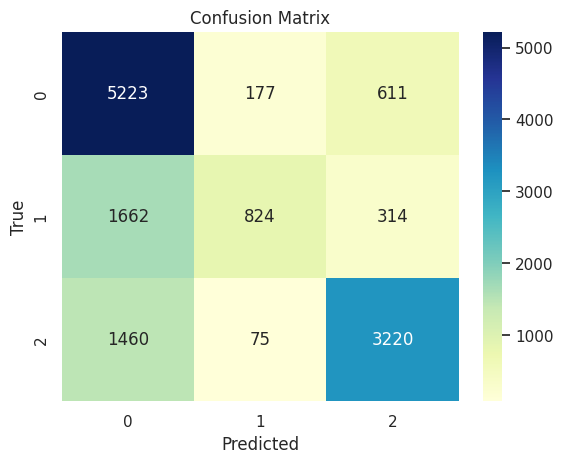

In [586]:
matrix(rf)

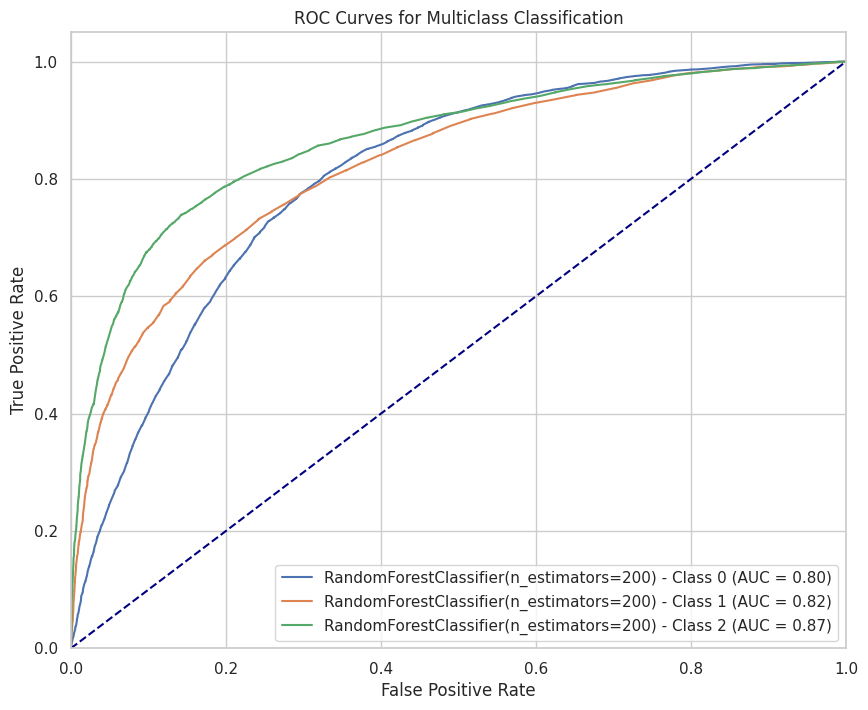

In [587]:
roccurve(rf)

#3. LRmodel Model



In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],

}



grid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

In [254]:
LRmodel=LogisticRegression(C= 1.0)

In [255]:
LRmodel.fit(X_train,y_train)
y_pred13=LRmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred13)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6893704850361198


              precision    recall  f1-score   support

           0       0.65      0.81      0.72      6011
           1       0.65      0.44      0.52      2800
           2       0.77      0.69      0.73      4755

    accuracy                           0.69     13566
   macro avg       0.69      0.64      0.66     13566
weighted avg       0.69      0.69      0.68     13566



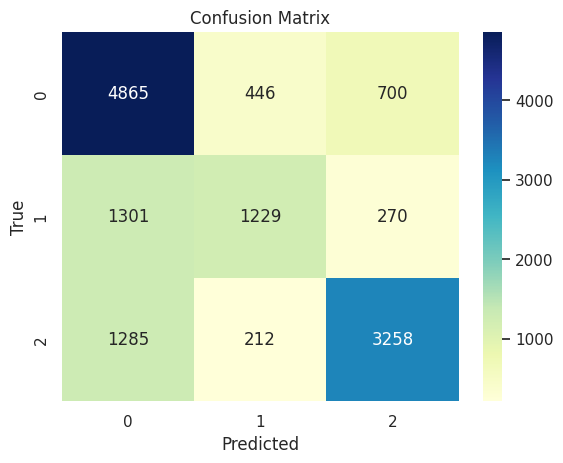

In [257]:
matrix(LRmodel)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


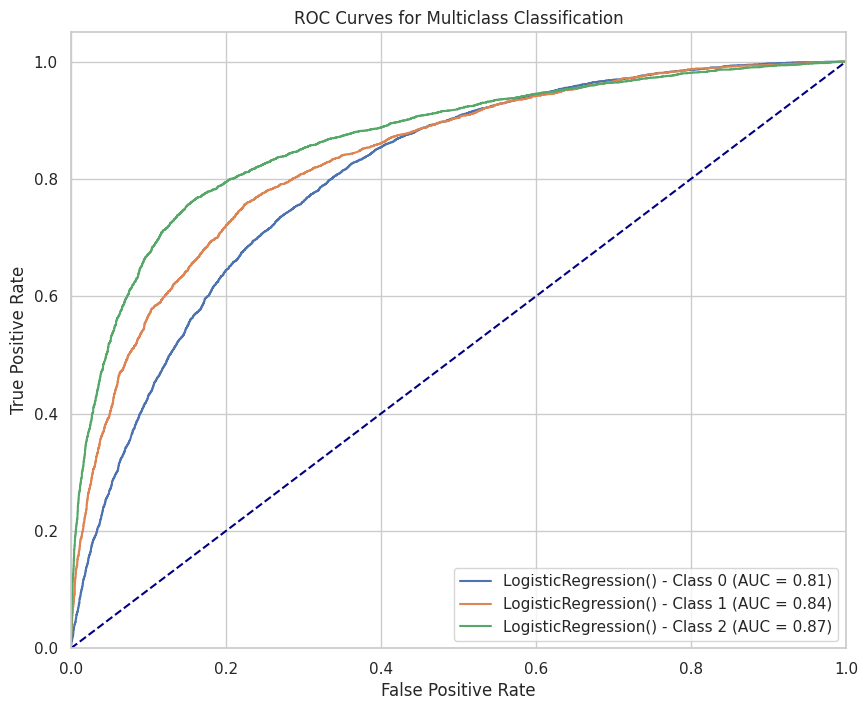

In [258]:
roccurve(LRmodel)

#4. SVM Model


In [311]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

param_dist = {

    'kernel': ['linear', 'rbf', 'poly'],
}

svm_linear = SVC()

random_search = RandomizedSearchCV(svm_linear, param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", random_search.best_score_)


Best parameters: {'kernel': 'linear'}
Best accuracy: 0.6968329301724068


In [312]:
svm_linear = SVC(kernel= 'linear', probability=True)

In [313]:
svm_linear.fit(X_train,y_train)
y_pred14=svm_linear.predict(X_test)

In [314]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred14)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.7014595311808934


              precision    recall  f1-score   support

           0       0.66      0.82      0.73      6011
           1       0.67      0.46      0.55      2800
           2       0.78      0.69      0.73      4755

    accuracy                           0.70     13566
   macro avg       0.71      0.66      0.67     13566
weighted avg       0.71      0.70      0.70     13566



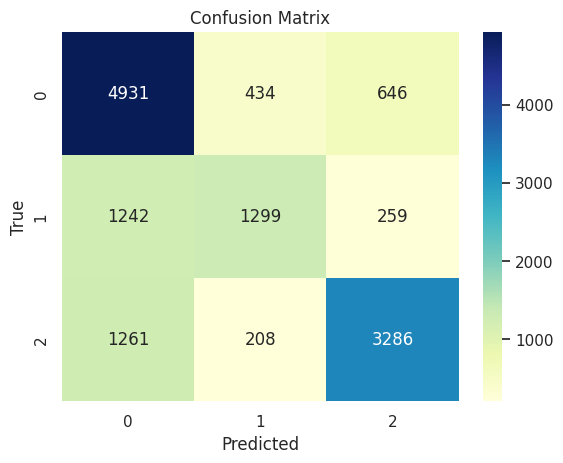

In [315]:
matrix(svm_linear)

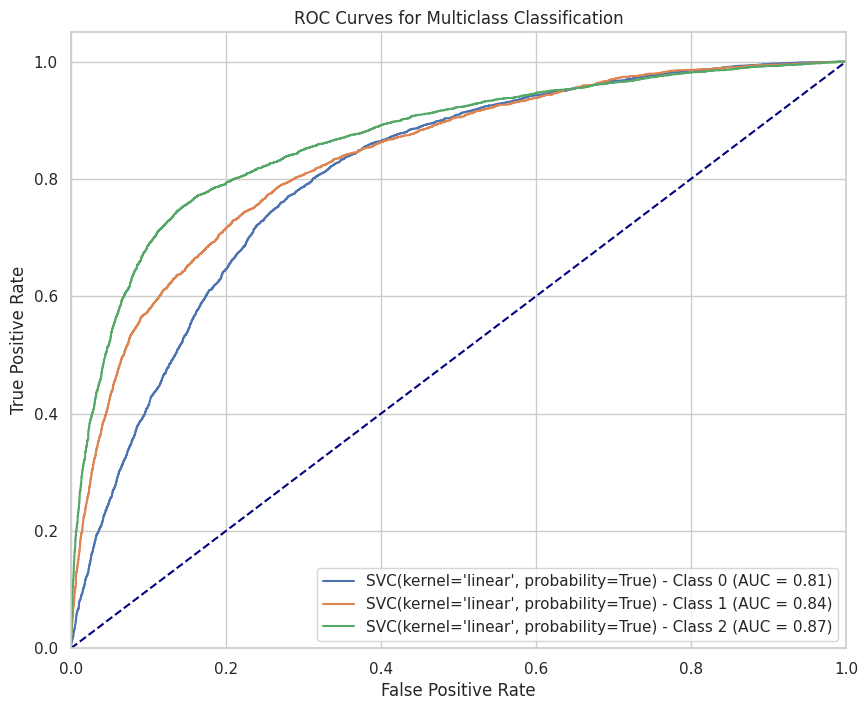

In [316]:
roccurve(svm_linear)

#5. MultinomialNB Model


In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False],
}
mnb = MultinomialNB()
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'alpha': 10.0, 'fit_prior': False}
Best accuracy: 0.6442734695959907


In [263]:
mnb=MultinomialNB(alpha= 10.0, fit_prior= False)

In [264]:
mnb.fit(X_train,y_train)
y_pred15=mnb.predict(X_test)

In [265]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred15)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6387291758808786


              precision    recall  f1-score   support

           0       0.59      0.81      0.68      6011
           1       0.68      0.19      0.29      2800
           2       0.71      0.69      0.70      4755

    accuracy                           0.64     13566
   macro avg       0.66      0.56      0.56     13566
weighted avg       0.65      0.64      0.61     13566



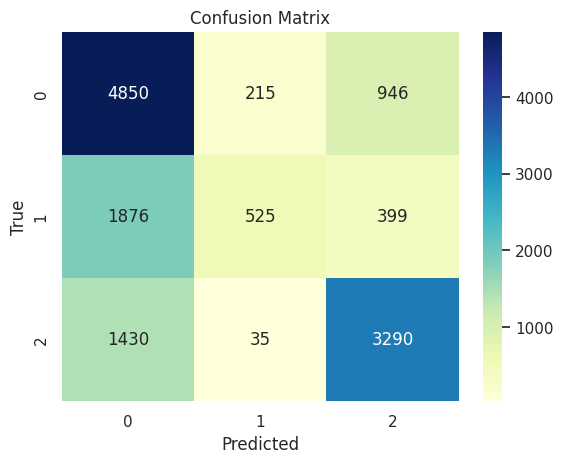

In [266]:
matrix(mnb)

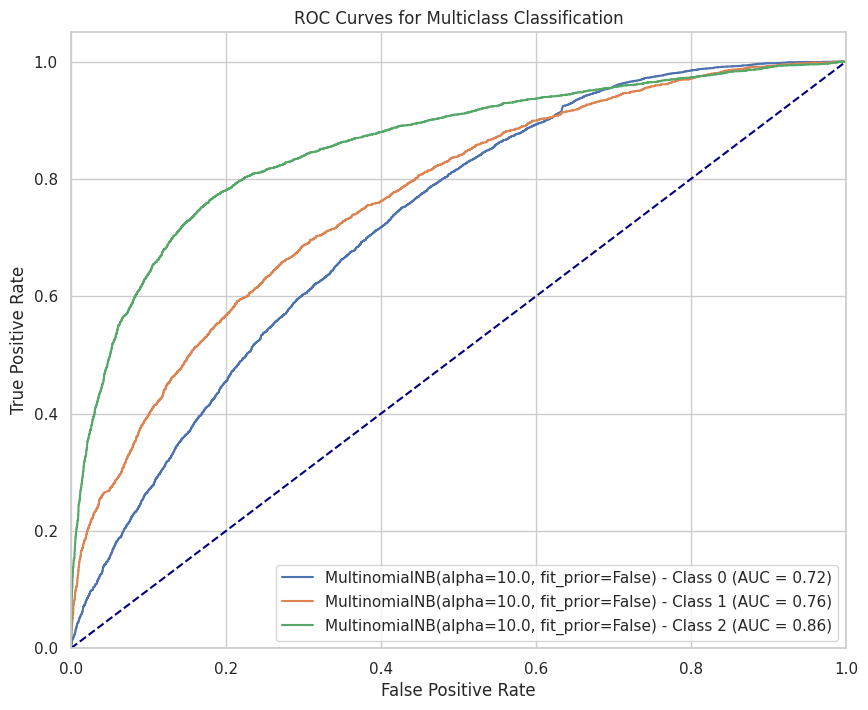

In [267]:
roccurve(mnb)

#6. SGDClassifier Modell


In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
}

sgd = SGDClassifier()

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Best parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l1'}
Best accuracy: 0.6938349947306822


In [270]:
sgd = SGDClassifier(alpha= 0.0001, loss= 'log', max_iter= 2000, penalty= 'l1')

In [271]:
sgd.fit(X_train,y_train)
y_pred16=sgd.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [272]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred16)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6916556096122659


              precision    recall  f1-score   support

           0       0.64      0.86      0.73      6011
           1       0.73      0.36      0.48      2800
           2       0.79      0.67      0.73      4755

    accuracy                           0.69     13566
   macro avg       0.72      0.63      0.65     13566
weighted avg       0.71      0.69      0.68     13566



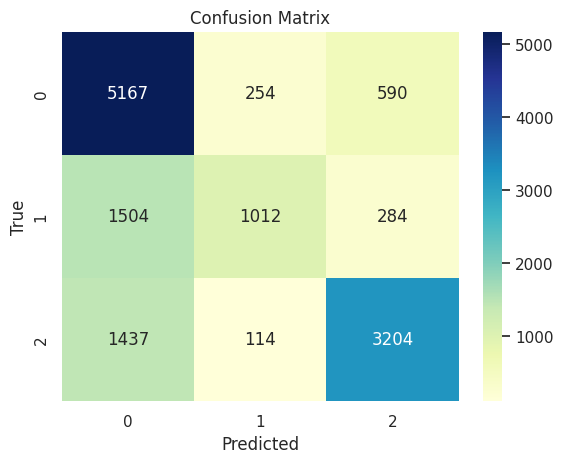

In [273]:
matrix(sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


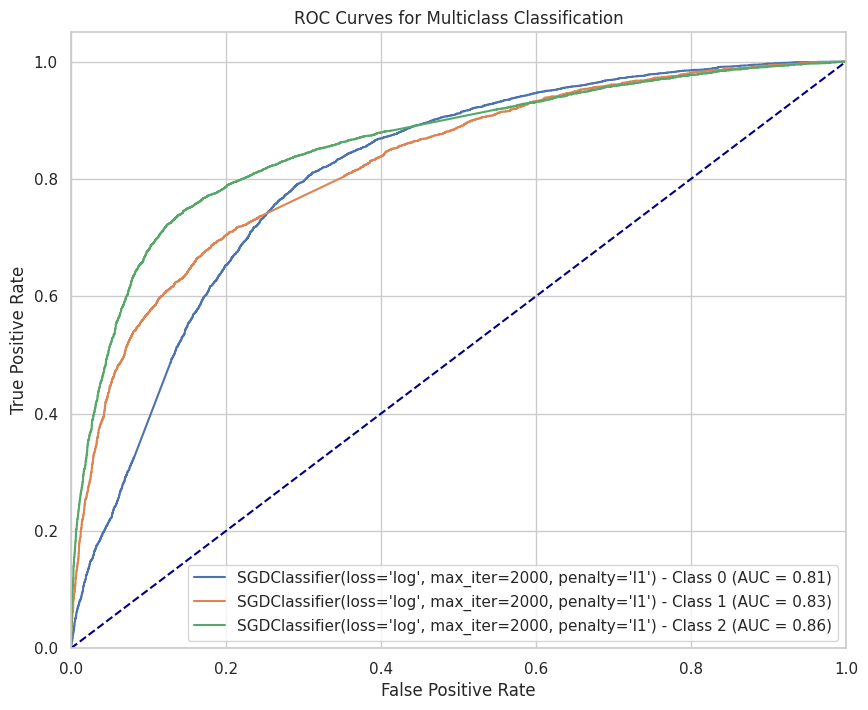

In [274]:
roccurve(sgd)

#7. KNeighborsClassifier Model


In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best accuracy: 0.5246827586893934


In [306]:
knn = KNeighborsClassifier(n_neighbors= 5, p= 1, weights= 'distance')

In [307]:
knn.fit(X_train,y_train)
y_pred17=knn.predict(X_test)

In [308]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred17)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.5316968892820286


              precision    recall  f1-score   support

           0       0.50      0.88      0.64      6011
           1       0.52      0.16      0.25      2800
           2       0.72      0.30      0.43      4755

    accuracy                           0.53     13566
   macro avg       0.58      0.45      0.44     13566
weighted avg       0.58      0.53      0.48     13566



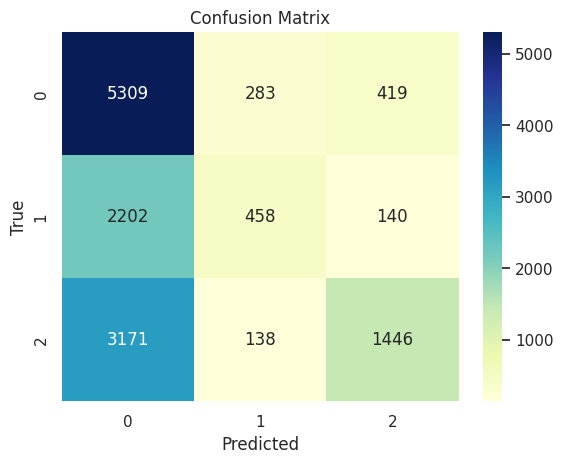

In [309]:
matrix(knn)

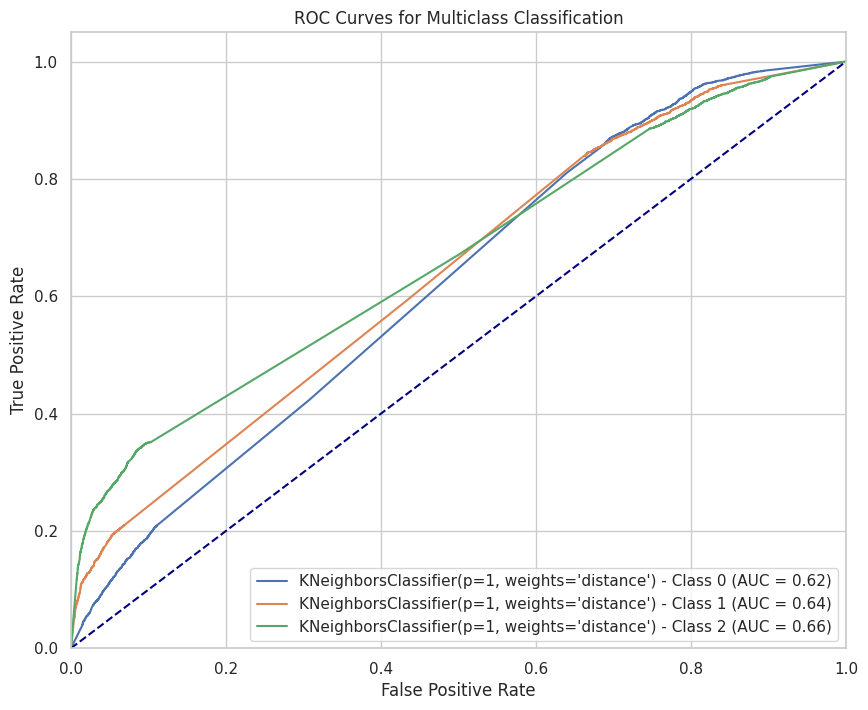

In [310]:
roccurve(knn)

#8. DecisionTreeClassifier Model


In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy: 0.643806781012826


In [301]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 1, min_samples_split= 2)

In [302]:
dt.fit(X_train,y_train)
y_pred18=dt.predict(X_test)

In [303]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred18)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6421200058970957


              precision    recall  f1-score   support

           0       0.59      0.89      0.71      6011
           1       0.67      0.22      0.33      2800
           2       0.78      0.58      0.67      4755

    accuracy                           0.64     13566
   macro avg       0.68      0.56      0.57     13566
weighted avg       0.67      0.64      0.61     13566



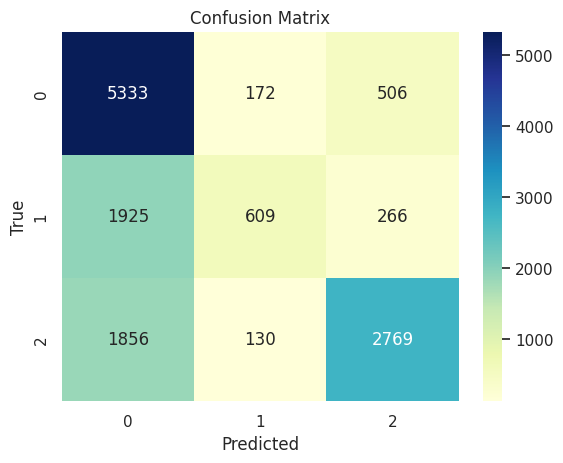

In [304]:
matrix(dt)

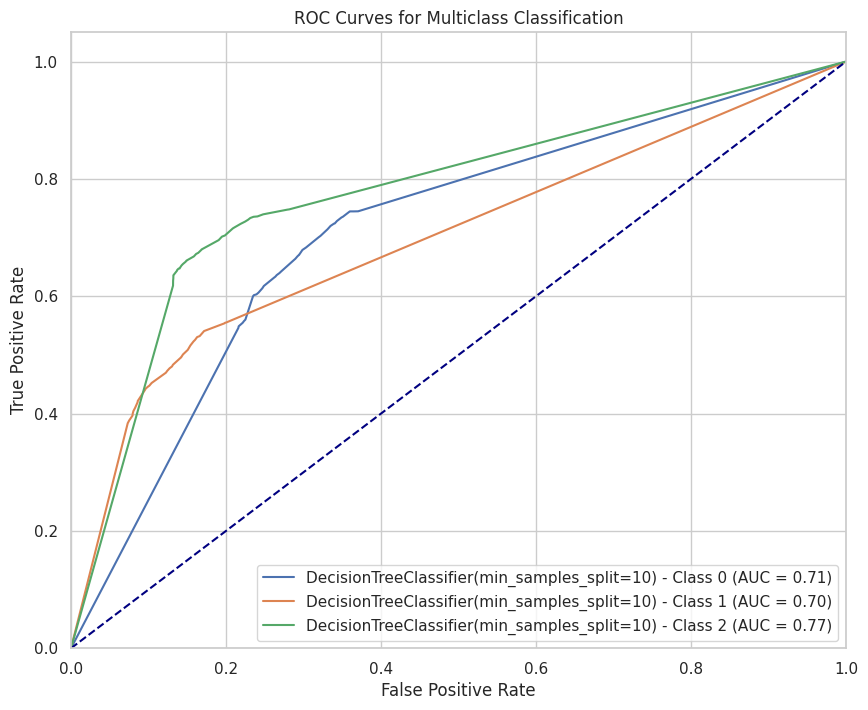

In [285]:
roccurve(dt)

#9. GradientBoostingClassifier Model


In [299]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

param_dist = {
    'learning_rate': [0.01, 0.1],

}

gb = GradientBoostingClassifier()

random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", random_search.best_score_)

Best parameters: {'learning_rate': 0.1}
Best accuracy: 0.6643488037848524


In [287]:
gb = GradientBoostingClassifier(learning_rate= 0.1)

In [288]:
gb.fit(X_train,y_train)
y_pred19=gb.predict(X_test)

In [289]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred19)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6650449653545629


              precision    recall  f1-score   support

           0       0.60      0.90      0.72      6011
           1       0.77      0.27      0.40      2800
           2       0.79      0.61      0.69      4755

    accuracy                           0.67     13566
   macro avg       0.72      0.59      0.60     13566
weighted avg       0.70      0.67      0.64     13566



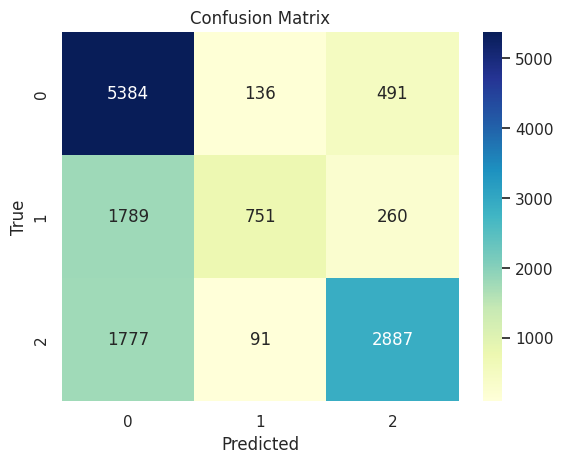

In [290]:
matrix(gb)

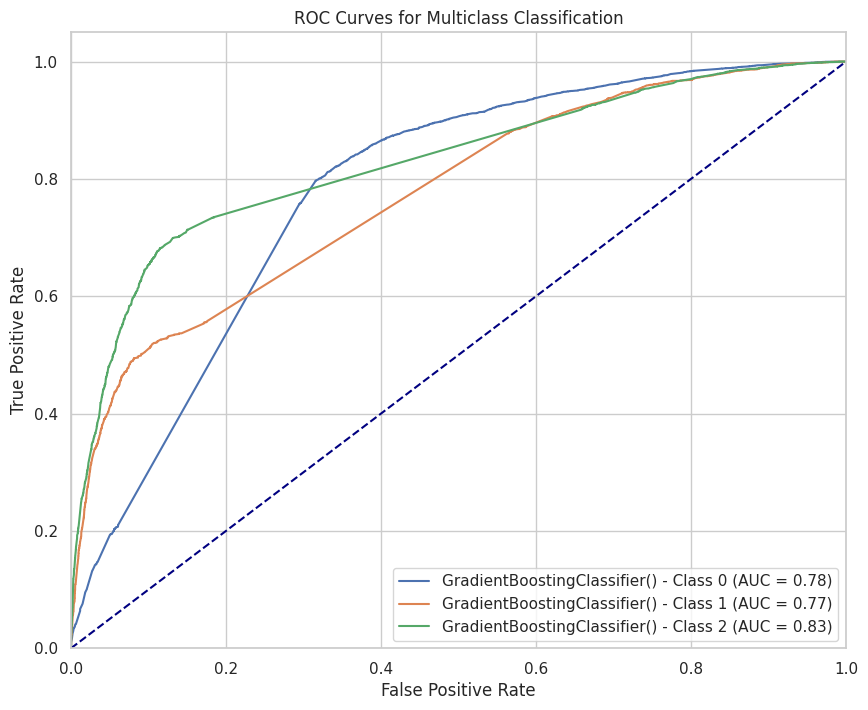

In [291]:
roccurve(gb)

#10. LGBMClassifier Model

In [292]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

lgbm = lgb.LGBMClassifier()

grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best accuracy:", grid_search.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [294]:
lgbm = lgb.LGBMClassifier(learning_rate= 0.2, max_depth= 4, n_estimators=200)

In [295]:
lgbm.fit(X_train,y_train)
y_pred20=lgbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.095121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62038
[LightGBM] [Info] Number of data points in the train set: 40697, number of used features: 1728
[LightGBM] [Info] Start training from score -0.813896
[LightGBM] [Info] Start training from score -1.578161
[LightGBM] [Info] Start training from score -1.048345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [296]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred20)
# Print the results
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.6982898422526905


              precision    recall  f1-score   support

           0       0.65      0.85      0.74      6011
           1       0.72      0.40      0.52      2800
           2       0.78      0.68      0.73      4755

    accuracy                           0.70     13566
   macro avg       0.72      0.64      0.66     13566
weighted avg       0.71      0.70      0.69     13566



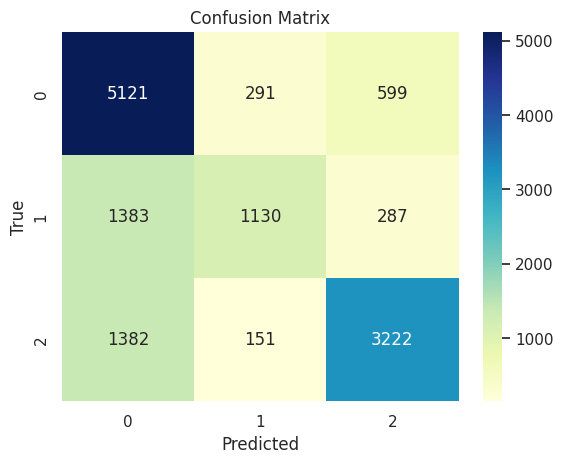

In [297]:
matrix(lgbm)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.574435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62038
[LightGBM] [Info] Number of data points in the train set: 40697, number of used features: 1728
[LightGBM] [Info] Start training from score -0.813896
[LightGBM] [Info] Start training from score -1.578161
[LightGBM] [Info] Start training from score -1.048345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

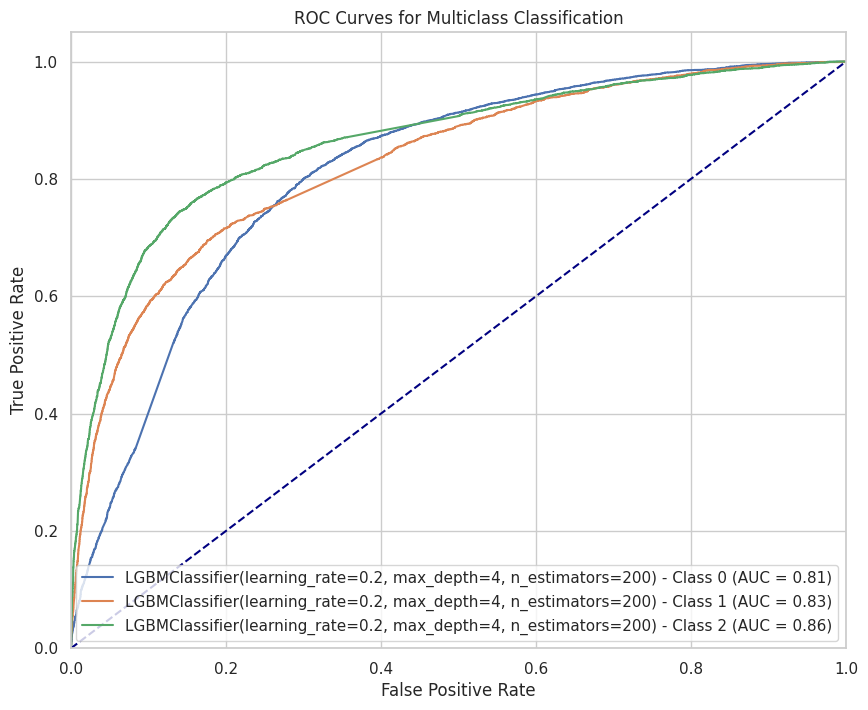

In [298]:
roccurve(lgbm)

# Hyperparameter tuned
#1. BernaulliNB Model
Accuracy is  : 0.6342
#2. RandomForestClassifier Model
Accuracy is : 0.6981
#3. LRmodel Model
Accuracy is :  0.6893
#4. SVM Model
Accuracy is :  0.7
#5. MultinomialNB Model
Accuracy is :  0.6387
#6. SGDClassifier Modell
Accuracy is :  0.6916
#7. KNeighborsClassifier Model
Accuracy is :  0.5316
#8. DecisionTreeClassifier Model
Accuracy is :  0.6421
#9. GradientBoostingClassifier Model
Accuracy is :  0.665
#10. LGBMClassifier Model
Accuracy is :  0.6982



# Bert Models

In [493]:
from datasets import DatasetDict
import pandas as pd

In [494]:
from datasets import Dataset

In [495]:
dfbackup=df.copy()

In [496]:
df = Dataset.from_pandas(df)
df

Dataset({
    features: ['text', 'labels', '__index_level_0__'],
    num_rows: 54263
})

In [497]:

df = DatasetDict({"train":df})

In [498]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 54263
    })
})

In [499]:
go_emotions.update(df)
go_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 54263
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [519]:
go_emotions['train'][0]

{'text': "I can't believe [NAME] is considered an mua and he can find match his foundation lmao",
 'labels': 0,
 '__index_level_0__': 41262}

In [520]:
go_emotions['test'][:3]

{'text': ['I don’t cry, either. It’s weird. I think it’s a personality/mentality thing. Just depends on how your brain is wired I think',
  'This is creepy.',
  "i'm calling [NAME] noms with [NAME] [NAME]"],
 'labels': [[22], [14], [27]],
 'id': ['ee0l2l1', 'ed00rv5', 'eezsv9j']}

In [521]:
go_emotions['train'] = go_emotions['train'].shuffle(seed=1).select(range(5000))
go_emotions['train']

Dataset({
    features: ['text', 'labels', '__index_level_0__'],
    num_rows: 5000
})

In [522]:
go_emotions_train_validation = go_emotions['train'].train_test_split(train_size=0.8)
go_emotions_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1000
    })
})

In [523]:
go_emotions_train_validation['test']

Dataset({
    features: ['text', 'labels', '__index_level_0__'],
    num_rows: 1000
})

In [524]:
go_emotions_train_validation['validation'] = go_emotions_train_validation.pop('test')
go_emotions_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1000
    })
})

In [525]:
go_emotions.update(go_emotions_train_validation)
go_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 2000
    })
})

In [526]:
go_emotions['test'] = go_emotions['test'].shuffle(seed=1).select(range(1000))
go_emotions['test']

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 1000
})

In [527]:
go_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 1000
    })
})

In [528]:
go_emotions.reset_format()

## Tokenizer

In [543]:
from transformers import AutoTokenizer
#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

go_emotions_encoded = go_emotions.map(tokenize_function, batched=True, batch_size=None)
go_emotions_encoded

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [544]:
print(go_emotions_encoded['train'][0])

{'text': 'This really shows how young and ignorant most of them are.', 'labels': 1, '__index_level_0__': 16549, 'input_ids': [101, 1188, 1541, 2196, 1293, 1685, 1105, 24636, 1211, 1104, 1172, 1132, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


## Tiny Go Emotion

In [545]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Se

In [546]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 7
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

In [547]:
from datasets import DatasetDict

tiny_go_emotions = DatasetDict()
tiny_go_emotions['train'] = go_emotions['train'].shuffle(seed=1).select(range(500))
tiny_go_emotions['validation'] = go_emotions['validation'].shuffle(seed=1).select(range(100))
tiny_go_emotions['test'] = go_emotions['test'].shuffle(seed=1).select(range(100))

tiny_go_emotions_encoded = tiny_go_emotions.map(tokenize_function, batched=True, batch_size=None)
tiny_go_emotions_encoded

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 500
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 100
    })
    test: Dataset({
        features: ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 100
    })
})

In [548]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_go_emotions_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-go_emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_always_push=False,
hub_mod

In [549]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_go_emotions_encoded["train"],
                  eval_dataset=tiny_go_emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

In [550]:
preds = trainer.predict(tiny_go_emotions_encoded['validation'])
preds

PredictionOutput(predictions=array([[ 0.6727841 , -0.05063641,  2.6005816 , -1.1363863 , -0.7278453 ,
        -0.92326015, -1.1984762 ],
       [ 2.0199778 ,  1.1036454 ,  0.70720863, -1.1298878 , -1.2714562 ,
        -0.9991791 , -1.0548944 ],
       [ 1.9992388 ,  1.0656374 ,  1.2031667 , -1.4079436 , -1.2453525 ,
        -1.2566926 , -1.0638783 ],
       [ 1.959182  ,  0.8648695 ,  1.5737827 , -1.3431642 , -1.3178561 ,
        -1.2475351 , -1.1509067 ],
       [ 1.7951586 ,  0.92456084,  1.5934069 , -1.3053172 , -1.321533  ,
        -1.3941674 , -1.0468444 ],
       [ 1.1386309 ,  0.18821439,  2.333774  , -1.4689462 , -0.8988445 ,
        -1.1693801 , -1.1504799 ],
       [ 1.9883788 ,  0.9201845 ,  1.4821184 , -1.4849277 , -1.2387023 ,
        -1.2974524 , -1.2214513 ],
       [ 1.7766533 ,  0.73401034,  1.7727513 , -1.4071863 , -1.3739171 ,
        -1.3983964 , -1.0958562 ],
       [ 0.41719002, -0.01537578,  2.5030763 , -0.9643996 , -0.75619733,
        -0.8783203 , -1.1013954 ],

In [551]:
 preds.predictions.shape

(100, 7)

In [552]:
preds.predictions.argmax(axis=-1)

array([2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0])

In [553]:
preds.label_ids

array([2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0,
       0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0])

In [554]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.72

In [555]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

In [556]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_go_emotions_encoded["train"],
                  eval_dataset=tiny_go_emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

## Training run

In [557]:
batch_size = 8
logging_steps = len(go_emotions["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-go_emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [558]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=go_emotions_encoded["train"],
                  eval_dataset=go_emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

In [559]:
trainer.evaluate()

{'eval_loss': 1.5372071266174316,
 'eval_accuracy': 0.731,
 'eval_runtime': 181.4241,
 'eval_samples_per_second': 5.512,
 'eval_steps_per_second': 0.689,
 'epoch': 4.0}

In [560]:
trainer.save_model()

In [561]:
model_name

'bert-base-cased-finetuned-go_emotion'

In [562]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_1', 'score': 0.9980447292327881}]

In [564]:
classifier('i am happy')

[{'label': 'LABEL_2', 'score': 0.9986914992332458}]

#Comparison of Accuracies and F1 scores

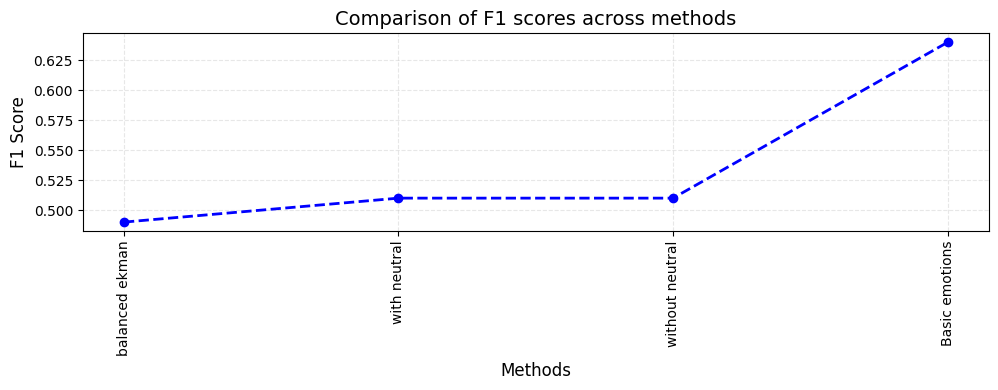

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.49,0.51,0.51,0.64]
# Names
methods=['balanced ekman','with neutral','without neutral','Basic emotions']

plt.figure(figsize=(10,4))
plt.plot(methods,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across methods',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


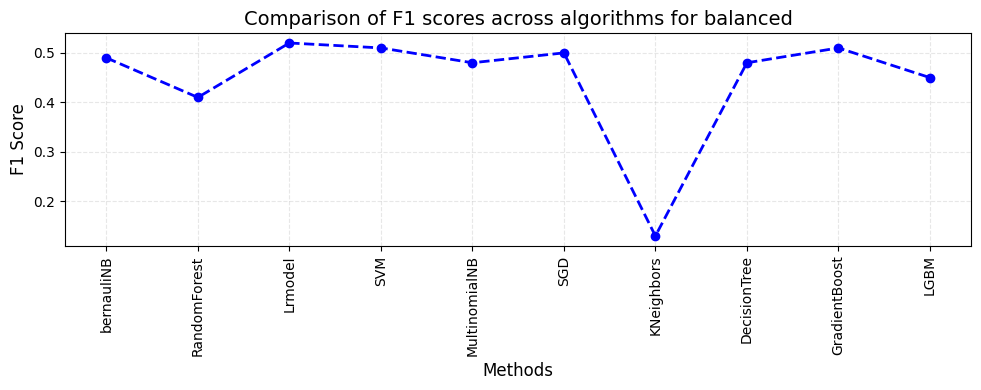

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.49,
0.41,
0.52,
0.51,
0.48,
0.5,
0.13,
0.48,
0.51,
0.45
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms for balanced',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


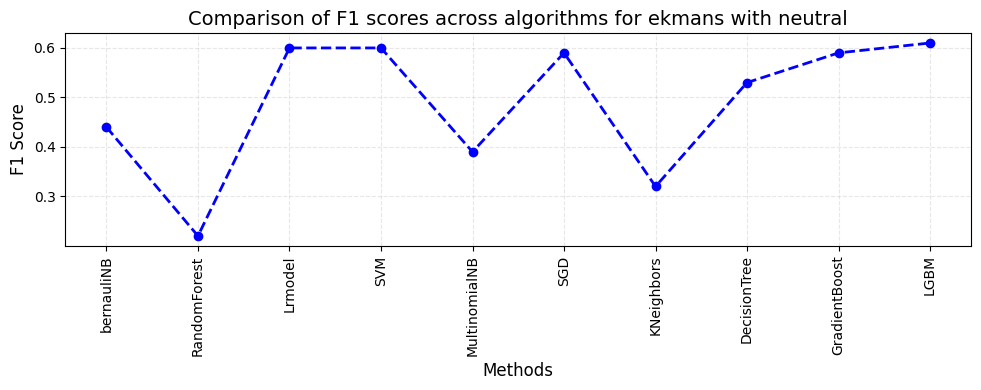

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.44,
0.22,
0.6,
0.6,
0.39,
0.59,
0.32,
0.53,
0.59,
0.61
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms for ekmans with neutral',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


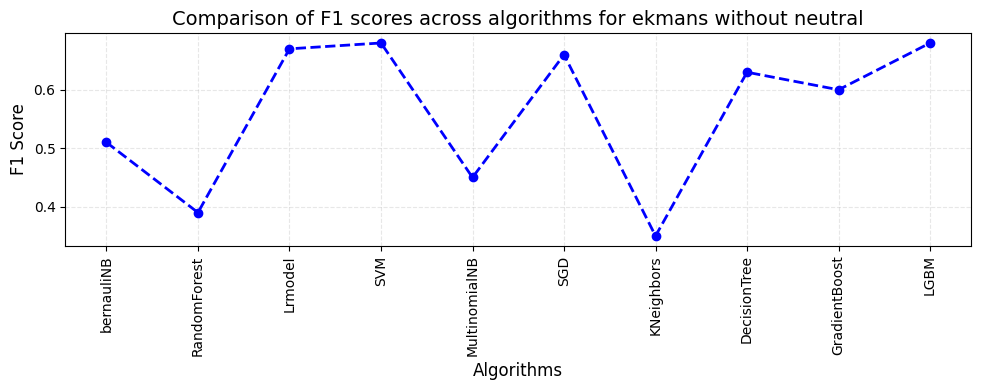

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.51,
0.39,
0.67,
0.68,
0.45,
0.66,
0.35,
0.63,
0.6,
0.68,

]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms for ekmans without neutral',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

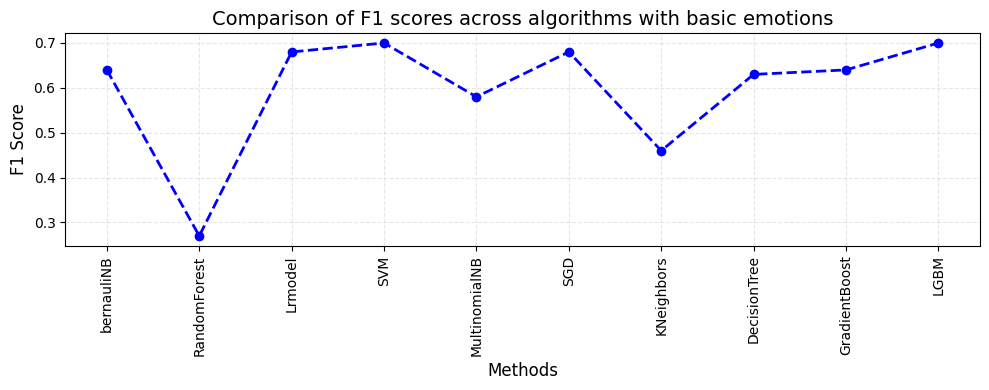

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.64,
0.27,
0.68,
0.7,
0.58,
0.68,
0.46,
0.63,
0.64,
0.7


]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms with basic emotions',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

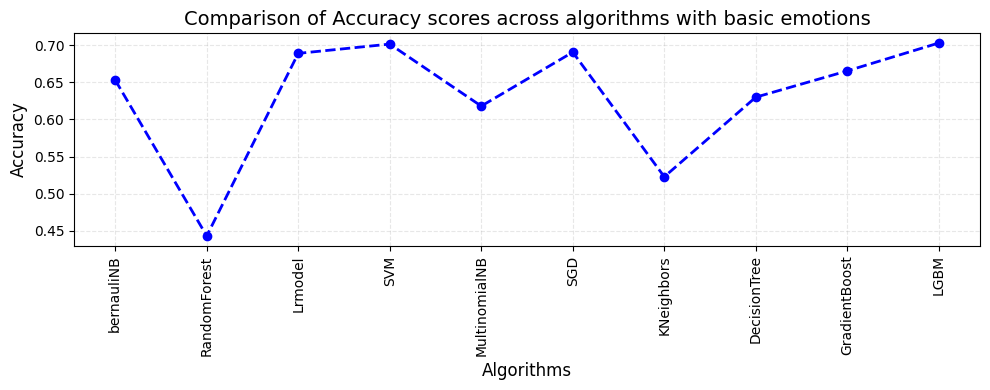

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.653,
0.443,
0.6889,
0.7014,
0.6179,
0.6905,
0.5227,
0.6299,
0.6653,
0.7029
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms with basic emotions',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

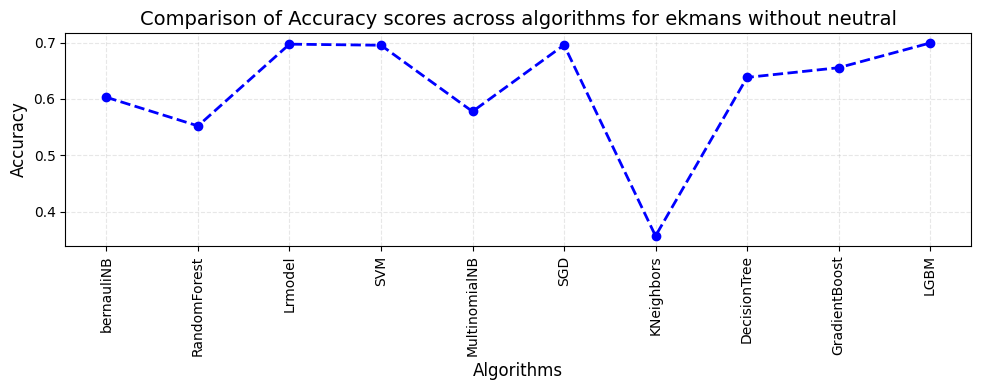

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.603,
0.5522,
0.6973,
0.6954,
0.5778,
0.6958,
0.3569,
0.6383,
0.6555,
0.6994
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms for ekmans without neutral',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

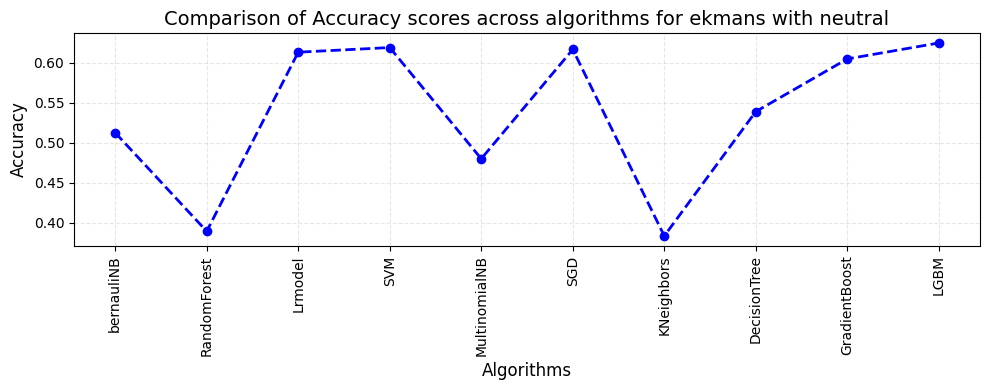

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.5123,
0.3892,
0.6129,
0.6187,
0.4798,
0.6163,
0.3834,
0.5387,
0.6045,
0.6244

]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms for ekmans with neutral',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

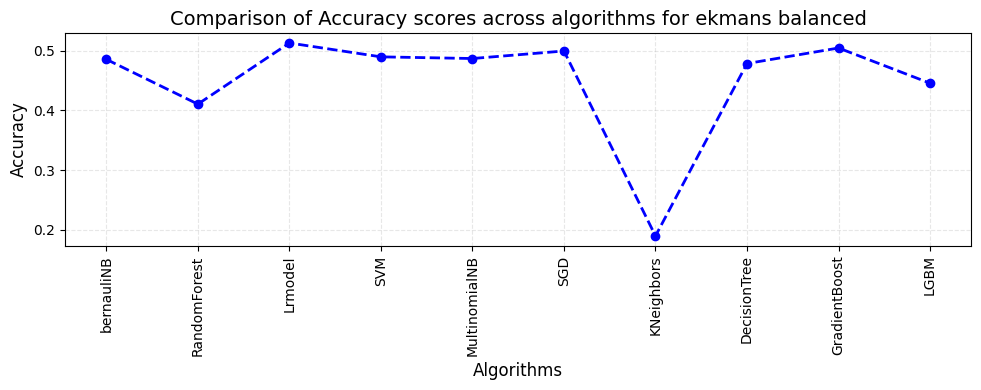

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.4852,
0.4103,
0.5126,
0.4894,
0.4866,
0.4992,
0.18977,
0.4782,
0.5042,
0.4453
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms for ekmans balanced',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

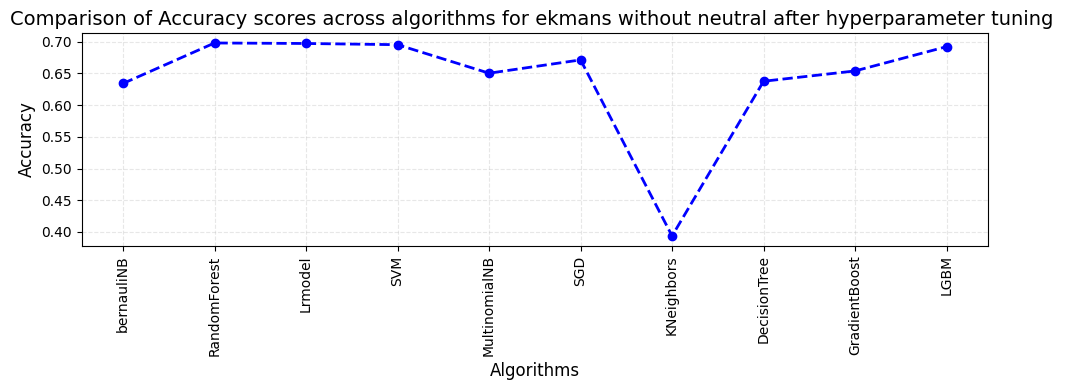

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.6342,
0.6981,
0.6973,
0.6954,
0.6504,
0.6714,
0.3936,
0.6377,
0.654,
0.6923

]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms for ekmans without neutral after hyperparameter tuning ',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

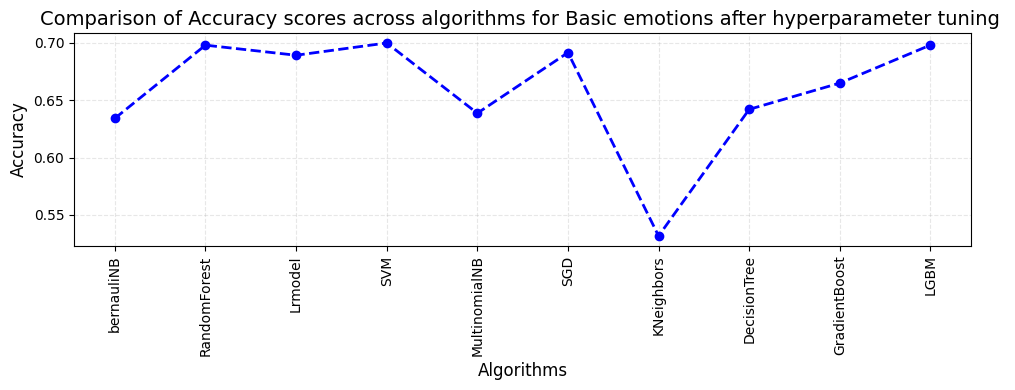

In [ ]:
import matplotlib.pyplot as plt
# Accuracy
Accuracy=[0.6342,
0.6981,
0.6893,
0.7,
0.6387,
0.6916,
0.5316,
0.6421,
0.665,
0.6982


]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,Accuracy,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Algorithms',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Comparison of Accuracy scores across algorithms for Basic emotions after hyperparameter tuning ',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

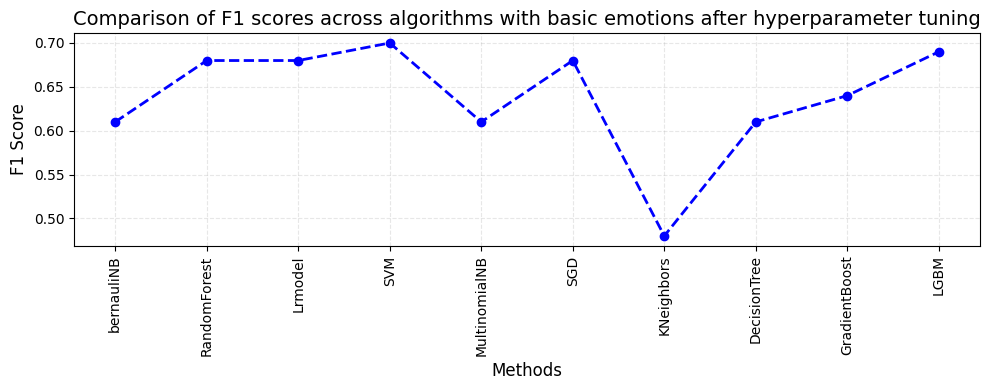

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.61,
0.68,
0.68,
0.7,
0.61,
0.68,
0.48,
0.61,
0.64,
0.69
]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms with basic emotions after hyperparameter tuning',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

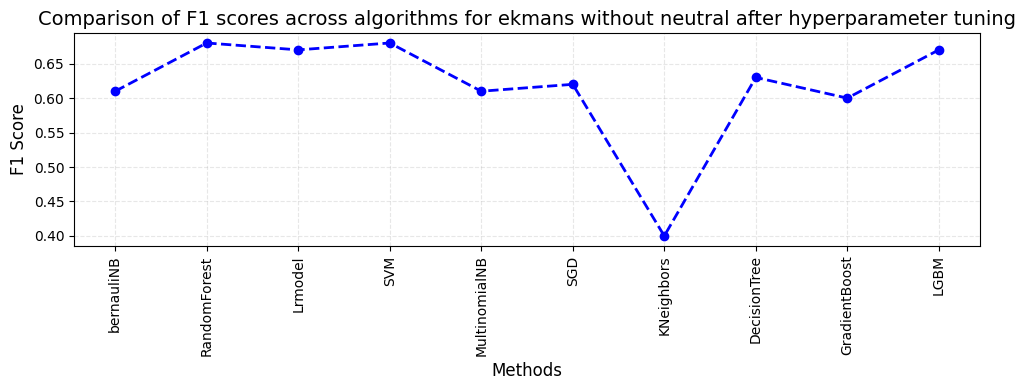

In [ ]:
import matplotlib.pyplot as plt
# F1 scores
F1_scores=[0.61,
0.68,
0.67,
0.68,
0.61,
0.62,
0.4,
0.63,
0.6,
0.67

]
# Names
algorithms=['bernauliNB','RandomForest','Lrmodel','SVM','MultinomialNB','SGD'
,'KNeighbors','DecisionTree','GradientBoost','LGBM'
]

plt.figure(figsize=(10,4))
plt.plot(algorithms,F1_scores,marker='o',linewidth=2,color='blue',linestyle='--')

plt.xlabel('Methods',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Comparison of F1 scores across algorithms for ekmans without neutral after hyperparameter tuning',fontsize=14)

plt.grid(True,linestyle='--',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks(rotation=90)

plt.grid(alpha=0.3)
plt.tight_layout()
